In [1]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [2]:
def smooth(y,w=17,o=1,d=2):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

#### Fig-1: Comparison of growth patterns

##### Uber trips in NYC declines from March to July 2019 due to new minimum wage rule (https://www.businessinsider.com/uber-lyft-rides-decline-after-new-york-minimum-wage-2019-7?IR=T). Indeed, Uber needed to make more money to pay its drivers, so it increased the trip fares, this decreased the number of travellers and consequently the number of drivers.The next massive drop is because of Covid. 

In [3]:
# import data
nyc = pd.read_csv('data/Uber_NYC_2012-2022.csv')
nyc.date = nyc.apply(lambda row: pd.Timestamp(row.date), axis=1)
nyc.at[0,'date'] = pd.Timestamp('2012-07-01')

mi = pd.read_csv('data/Uber_Miami.csv')
mi.date = mi.apply(lambda row: pd.Timestamp(row.date), axis=1)

sea = pd.read_csv('data/Uber_Seattle.csv')
sea.date = sea.apply(lambda row: pd.Timestamp(row.date), axis=1)

ams = pd.read_csv('data/Uber_Ams_2016-2022.csv')
ams.date = ams.apply(lambda row: pd.Timestamp(row.date), axis=1)

arjan = pd.read_csv('data/Arjan_supply.csv')
arjan.date = arjan.apply(lambda row: pd.Timestamp(row.date), axis=1)

djavadian = pd.read_csv('data/Djavadian_supply.csv')
djavadian.date = djavadian.apply(lambda row: pd.Timestamp(row.date), axis=1)

ertz = pd.read_csv('data/Ertz_supply.csv')
ertz.date = ertz.apply(lambda row: pd.Timestamp(row.date), axis=1)

C:\Users\farno\AppData\Local\Temp/ipykernel_25456/1905389617.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels([0, '2x10\N{SUPERSCRIPT six}', '4x10\N{SUPERSCRIPT six}', '6x10\N{SUPERSCRIPT six}',


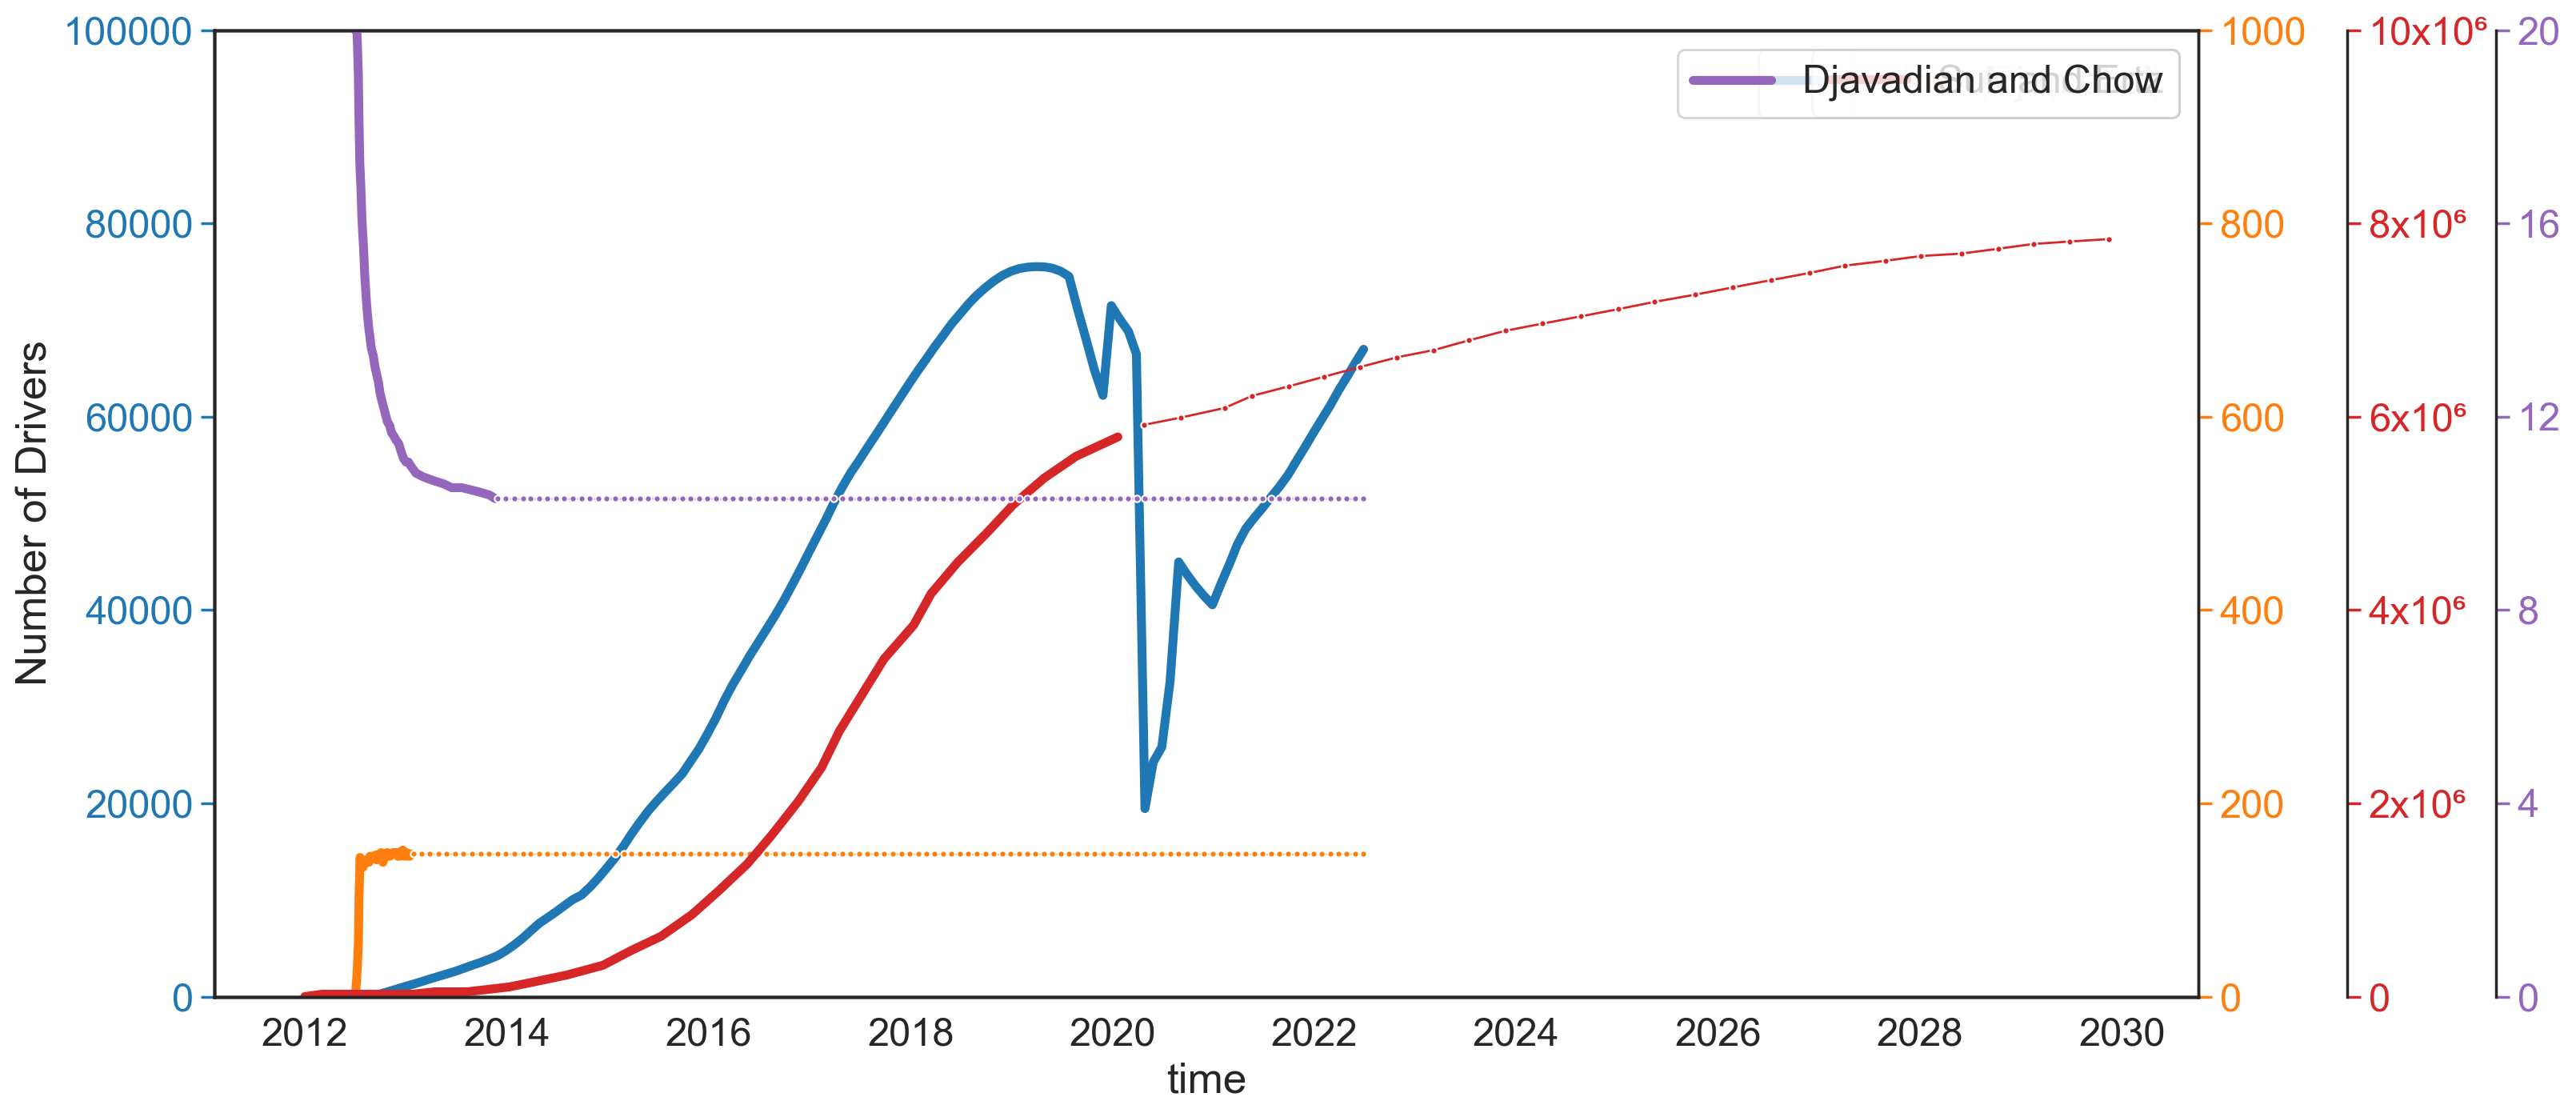

In [4]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
# sns.despine(left=True)

#---------------------NYC-------------------------------------------
nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'])
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
# nyc_y = [0 if math.isnan(y) else y/nyc_max*100*0.7 for y in nyc_y]
nyc_y = [0 if math.isnan(y) else y for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
c1 = 'C0'
sns.lineplot(x=nyc.date, y=nyc_y,lw=4, label = 'NYC (Empirical)', color=c1)
ax.set(xlabel='time', ylabel='Number of Drivers', ylim=(0,100000))
ax.tick_params(axis='y', colors=c1)

#--------------------Arjan----------------------------------------------------
ax2 = ax.twinx()
c2 = 'C1'
sns.lineplot(x=arjan.date, y=arjan.number_of_drivers,lw=4, label = 'Arjan et al.', color=c2)
sns.lineplot(x=nyc.loc[6:].date, y=147.727,lw=1, color=c2, marker = '.')
ax2.set(xlabel='time',ylabel='', ylim=(0,1000))
ax2.tick_params(axis='y', colors=c2)
# ax11.grid(b=None)

#---------------------Ertz-------------------------------------------------
ax3 = ax.twinx()
c3 = 'C3'
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].number_of_drivers,lw=4, label = 'Sun and Ertz', color=c3)
sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].number_of_drivers,lw=1, color=c3, marker = '.')
ax3.set(xlabel='time',ylabel='', ylim=(0,10))
ax3.spines.right.set_position(("axes", 1.075))
ax3.tick_params(axis='y', colors=c3)
ax3.set_yticklabels([0, '2x10\N{SUPERSCRIPT six}', '4x10\N{SUPERSCRIPT six}', '6x10\N{SUPERSCRIPT six}',
                     '8x10\N{SUPERSCRIPT six}', '10x10\N{SUPERSCRIPT six}'])

#---------------------Djavadian-------------------------------------------------
ax4 = ax.twinx()
c4 = 'C4'
sns.lineplot(x=djavadian.date, y=djavadian.number_of_drivers,lw=4, label = 'Djavadian and Chow', color=c4)
sns.lineplot(x=nyc.loc[16:].date, y=10.3030,lw=1, color=c4, marker = '.')
ax4.set(xlabel='time',ylabel='', ylim=(0,20))
ax4.spines.right.set_position(("axes", 1.15))
ax4.set_yticks([0,4,8,12,16,20])
ax4.tick_params(axis='y', colors=c4)
#--------------------------------------------------------------------------
# lines, labels = ax[1][1].get_legend_handles_labels()
# lines2, labels2 = ax11.get_legend_handles_labels()
# ax[1][1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.73,0.6))
# ax11.legend().remove()
# ax2.spines['right'].set_color('C7')
# ax2.tick_params(axis='y', colors='C7')
# ax2.yaxis.label.set_color('C7')

# sns.despine(left=True)


In [ ]:
=======================================================================

In [4]:
nyc = nyc.loc[0:88]
ertz = ertz.loc[2:29]
ams = ams[:47]
# yms = pd.read_csv('data/dataframes/baseline_supply1.csv')
# yms = yms[0:360]

In [6]:
yms = [0.0,
 0.005,
 0.007,
 0.011,
 0.022,
 0.016,
 0.025,
 0.029,
 0.019,
 0.028,
 0.024,
 0.028,
 0.03,
 0.019,
 0.031,
 0.037,
 0.033,
 0.035,
 0.045,
 0.029,
 0.04,
 0.033,
 0.032,
 0.045,
 0.024,
 0.029,
 0.036,
 0.045,
 0.031,
 0.028,
 0.044,
 0.029,
 0.035,
 0.044,
 0.047,
 0.05,
 0.048,
 0.043,
 0.055,
 0.038,
 0.033,
 0.045,
 0.045,
 0.042,
 0.045,
 0.031,
 0.06,
 0.04,
 0.04,
 0.042,
 0.041,
 0.038,
 0.045,
 0.031,
 0.051,
 0.04,
 0.04,
 0.049,
 0.045,
 0.043,
 0.043,
 0.043,
 0.044,
 0.045,
 0.034,
 0.043,
 0.036,
 0.04,
 0.05,
 0.037,
 0.038,
 0.051,
 0.035,
 0.047,
 0.048,
 0.042,
 0.05,
 0.048,
 0.049,
 0.055,
 0.049,
 0.047,
 0.045,
 0.044,
 0.041,
 0.054,
 0.052,
 0.05,
 0.042,
 0.035,
 0.034,
 0.057,
 0.04,
 0.054,
 0.044,
 0.046,
 0.039,
 0.044,
 0.052,
 0.045,
 0.053,
 0.033,
 0.045,
 0.045,
 0.035,
 0.04,
 0.036,
 0.049,
 0.045,
 0.035,
 0.037,
 0.043,
 0.054,
 0.051,
 0.044,
 0.041,
 0.043,
 0.058,
 0.052,
 0.047,
 0.046,
 0.054,
 0.062,
 0.058,
 0.049,
 0.05,
 0.046,
 0.054,
 0.056,
 0.05,
 0.059,
 0.056,
 0.053,
 0.054,
 0.054,
 0.063,
 0.061,
 0.058,
 0.069,
 0.062,
 0.081,
 0.067,
 0.077,
 0.057,
 0.062,
 0.061,
 0.066,
 0.063,
 0.072,
 0.066,
 0.069,
 0.07,
 0.069,
 0.062,
 0.056,
 0.081,
 0.068,
 0.071,
 0.077,
 0.078,
 0.086,
 0.084,
 0.083,
 0.077,
 0.097,
 0.081,
 0.071,
 0.094,
 0.084,
 0.088,
 0.092,
 0.082,
 0.097,
 0.081,
 0.093,
 0.089,
 0.091,
 0.086,
 0.1,
 0.096,
 0.086,
 0.083,
 0.099,
 0.095,
 0.082,
 0.111,
 0.106,
 0.099,
 0.1,
 0.098,
 0.076,
 0.106,
 0.094,
 0.1,
 0.117,
 0.117,
 0.117,
 0.107,
 0.109,
 0.107,
 0.115,
 0.109,
 0.117,
 0.114,
 0.121,
 0.126,
 0.121,
 0.132,
 0.113,
 0.129,
 0.118,
 0.128,
 0.11,
 0.129,
 0.12,
 0.116,
 0.115,
 0.136,
 0.135,
 0.147,
 0.136,
 0.131,
 0.14,
 0.127,
 0.127,
 0.14,
 0.137,
 0.15,
 0.148,
 0.149,
 0.15,
 0.145,
 0.167,
 0.145,
 0.142,
 0.153,
 0.148,
 0.172,
 0.157,
 0.151,
 0.164,
 0.175,
 0.155,
 0.163,
 0.168,
 0.164,
 0.176,
 0.168,
 0.172,
 0.178,
 0.16,
 0.172,
 0.175,
 0.186,
 0.166,
 0.183,
 0.189,
 0.169,
 0.173,
 0.19,
 0.193,
 0.19,
 0.201,
 0.185,
 0.184,
 0.191,
 0.203,
 0.191,
 0.193,
 0.184,
 0.189,
 0.202,
 0.194,
 0.205,
 0.198,
 0.213,
 0.21,
 0.212,
 0.212,
 0.224,
 0.213,
 0.196,
 0.199,
 0.194,
 0.226,
 0.216,
 0.204,
 0.221,
 0.22,
 0.221,
 0.239,
 0.237,
 0.225,
 0.23,
 0.236,
 0.22,
 0.26,
 0.238,
 0.231,
 0.223,
 0.236,
 0.229,
 0.243,
 0.253,
 0.248,
 0.239,
 0.267,
 0.226,
 0.243,
 0.232,
 0.242,
 0.242,
 0.242,
 0.233,
 0.265,
 0.268,
 0.261,
 0.248,
 0.241,
 0.241,
 0.268,
 0.262,
 0.26,
 0.271,
 0.254,
 0.27,
 0.275,
 0.301,
 0.257,
 0.263,
 0.263,
 0.276,
 0.28,
 0.29,
 0.295,
 0.267,
 0.285,
 0.283,
 0.29,
 0.261,
 0.27,
 0.285,
 0.295,
 0.273,
 0.283,
 0.287,
 0.292,
 0.287,
 0.294,
 0.294,
 0.288,
 0.29,
 0.304,
 0.293,
 0.292,
 0.307,
 0.309,
 0.292,
 0.297,
 0.319]

In [7]:
import datetime

base = pd.Timestamp('2012-07-01')
n_days = 360
step = 7.6 #7.6
# calculating timestamps for the next 10 days
timestamp_list = [base + datetime.timedelta(days=step*x) for x in range(n_days)]
me = pd.DataFrame()
me['supply_share'] = yms#smooth(yms, w=11)
me['date'] = timestamp_list

In [109]:
sns.color_palette("Greys")

[(0.9295040369088812, 0.9295040369088812, 0.9295040369088812),
 (0.819115724721261, 0.819115724721261, 0.819115724721261),
 (0.6770011534025375, 0.6770011534025375, 0.6770011534025375),
 (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
 (0.35912341407151094, 0.35912341407151094, 0.35912341407151094),
 (0.1679354094579008, 0.1679354094579008, 0.1679354094579008)]

C:\Users\farno\AppData\Local\Temp/ipykernel_1352/679274695.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
C:\Users\farno\AppData\Local\Temp/ipykernel_1352/679274695.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')


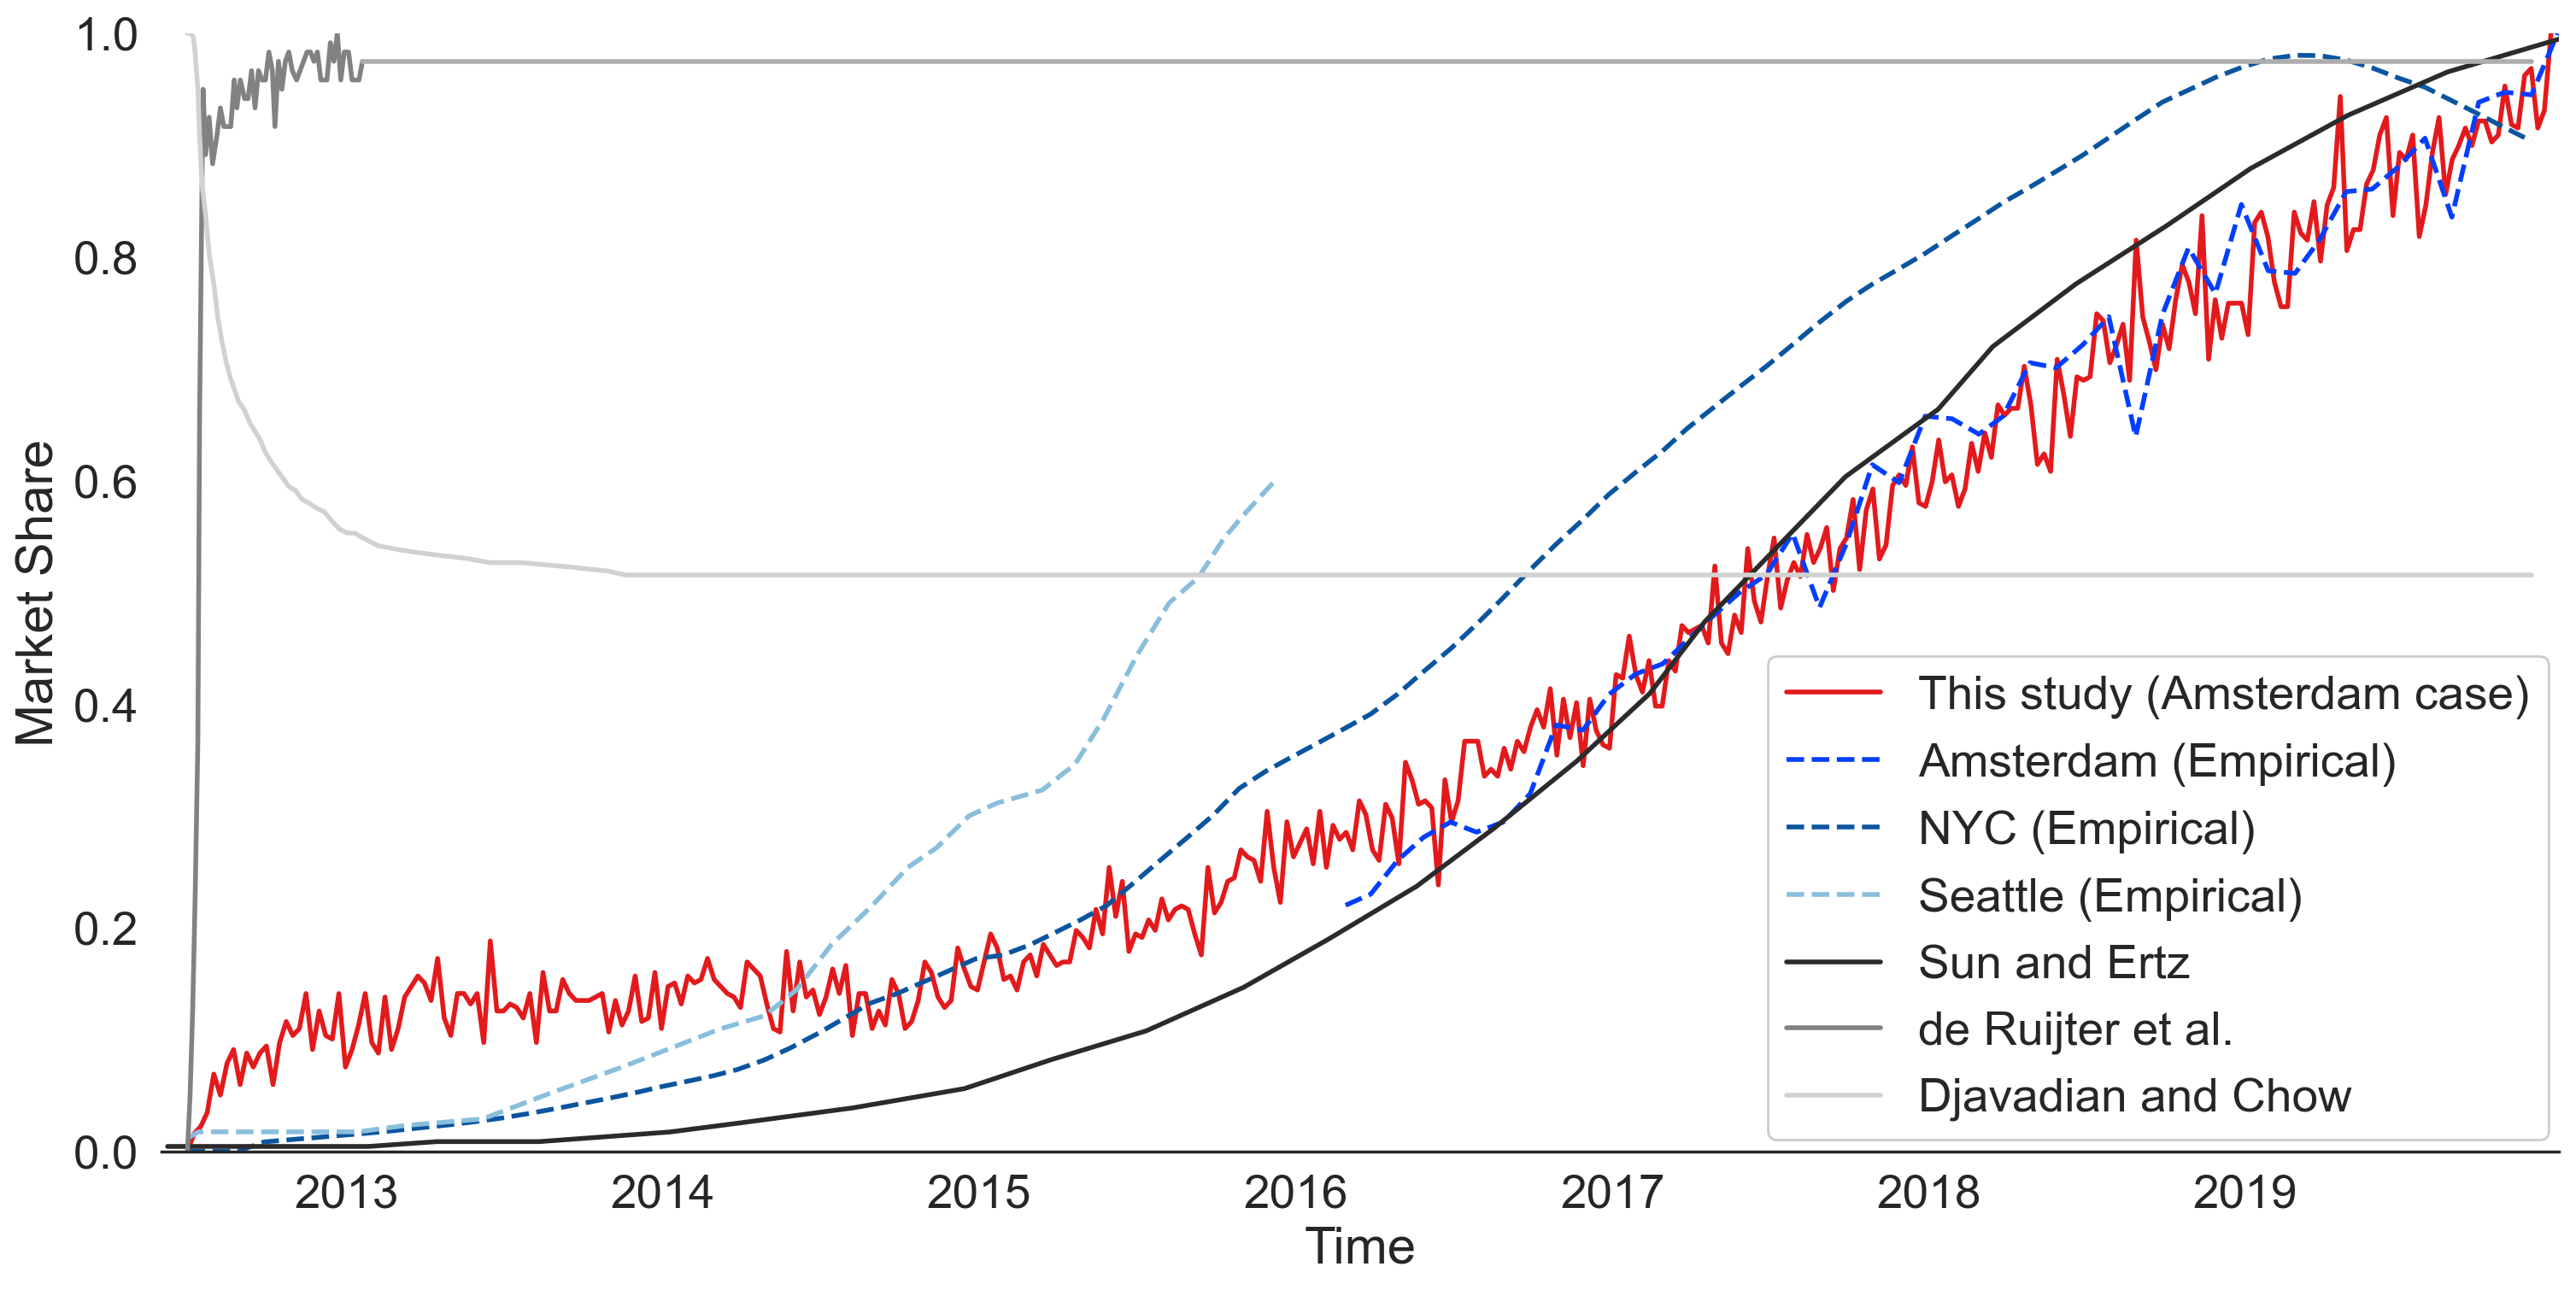

In [8]:
# Here we use min-max scaling or normalization: https://www.linkedin.com/advice/1/what-pros-cons-different-scaling-methods-data-normalization#:~:text=Data%20normalization%20and%20scaling%20can%20be%20achieved%20through%20several%20methods,dividing%20by%20the%20maximum%20value.

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.8)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

bright = sns.color_palette("bright")
blues = sns.color_palette("Blues")
greys = sns.color_palette("Greys")
paired = sns.color_palette("Paired")
#Us-----------------------------------------------------------------------
me_max = me.supply_share.max()
me_last_v = me.supply_share[len(me)-1]
sns.lineplot(x=me.date, y=me.supply_share/me_max,lw=2, label = 'This study (Amsterdam case)', color=paired[5])

#Empirical-----------------------------------------------------------------------
ams_max = ams['Number_of_drivers'].max()
ams_y =ams['Number_of_drivers']# smooth(ams['Number_of_drivers'], w=9)
ams_y = [0 if math.isnan(y) else y/ams_max for y in ams_y]
ams_y[0] = 0.22; ams_y[1] = 0.23
sns.lineplot(x=ams.date, y=ams_y,lw=2, label = 'Amsterdam (Empirical)', color=bright[0], linestyle = 'dashed')

nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'], w=9)
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
nyc_y = [0 if math.isnan(y) else y/nyc_max for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
sns.lineplot(x=nyc.date, y=nyc_y,lw=2, label = 'NYC (Empirical)', color=blues[5], linestyle = 'dashed')

sea_max = sea.supply_share.max()
sns.lineplot(x=sea.date, y=0.6*sea.supply_share/sea_max,lw=2, label = 'Seattle (Empirical)', color=blues[2], linestyle = 'dashed')

#State-of-art-----------------------------------------------------------------------
ertz_max = ertz.supply_share.max()
ertz_last_v = ertz.supply_share[len(ertz)-1]
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].supply_share/ertz_max,lw=2, label = 'Sun and Ertz', color=greys[5], linestyle = 'solid')
# sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].supply_share/ertz_max,lw=1, color='C2', marker = '.')

arjan_max = arjan.supply_share.max()
arjan_last_v = arjan.supply_share[len(arjan)-1]
sns.lineplot(x=arjan.date, y=arjan.supply_share/arjan_max, lw=2, label = 'de Ruijter et al.', color=greys[3], linestyle = 'solid')
aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
sns.lineplot(x=aj_date, y=arjan_last_v/arjan_max, lw=2, color=greys[2], linestyle = 'solid')

djavadian_max = djavadian.supply_share.max()
djavadian_last_v = djavadian.supply_share[len(djavadian)-1]
sns.lineplot(x=djavadian.date, y=djavadian.supply_share/djavadian_max,lw=2, label = 'Djavadian and Chow', color=greys[1], linestyle = 'solid')
dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')
sns.lineplot(x=dj_date, y=djavadian_last_v/djavadian_max,lw=2, color=greys[1], linestyle = 'solid')

ax.set(xlabel='Time', ylabel='Market Share',xlim=(pd.Timestamp('2012-06-01 00:00:00')
,pd.Timestamp('2019-12-30 00:00:00')), ylim=(0,1))
# labels = ['Ghasemi and Kucharski','NYC (Empirical)', 'Amsterdam (Empirical)', 'Miami (Empirical)', 'Djavadian and Chow', 'Sun and Ertz']
ax.legend(frameon=True,framealpha=1, loc=(0.67,0.01))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)

plt.tight_layout()
# plt.savefig('Figs/new/1_comparison.png')

In [119]:
sns.color_palette("bright")

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [120]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [8]:
def smooth(y,w=41,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

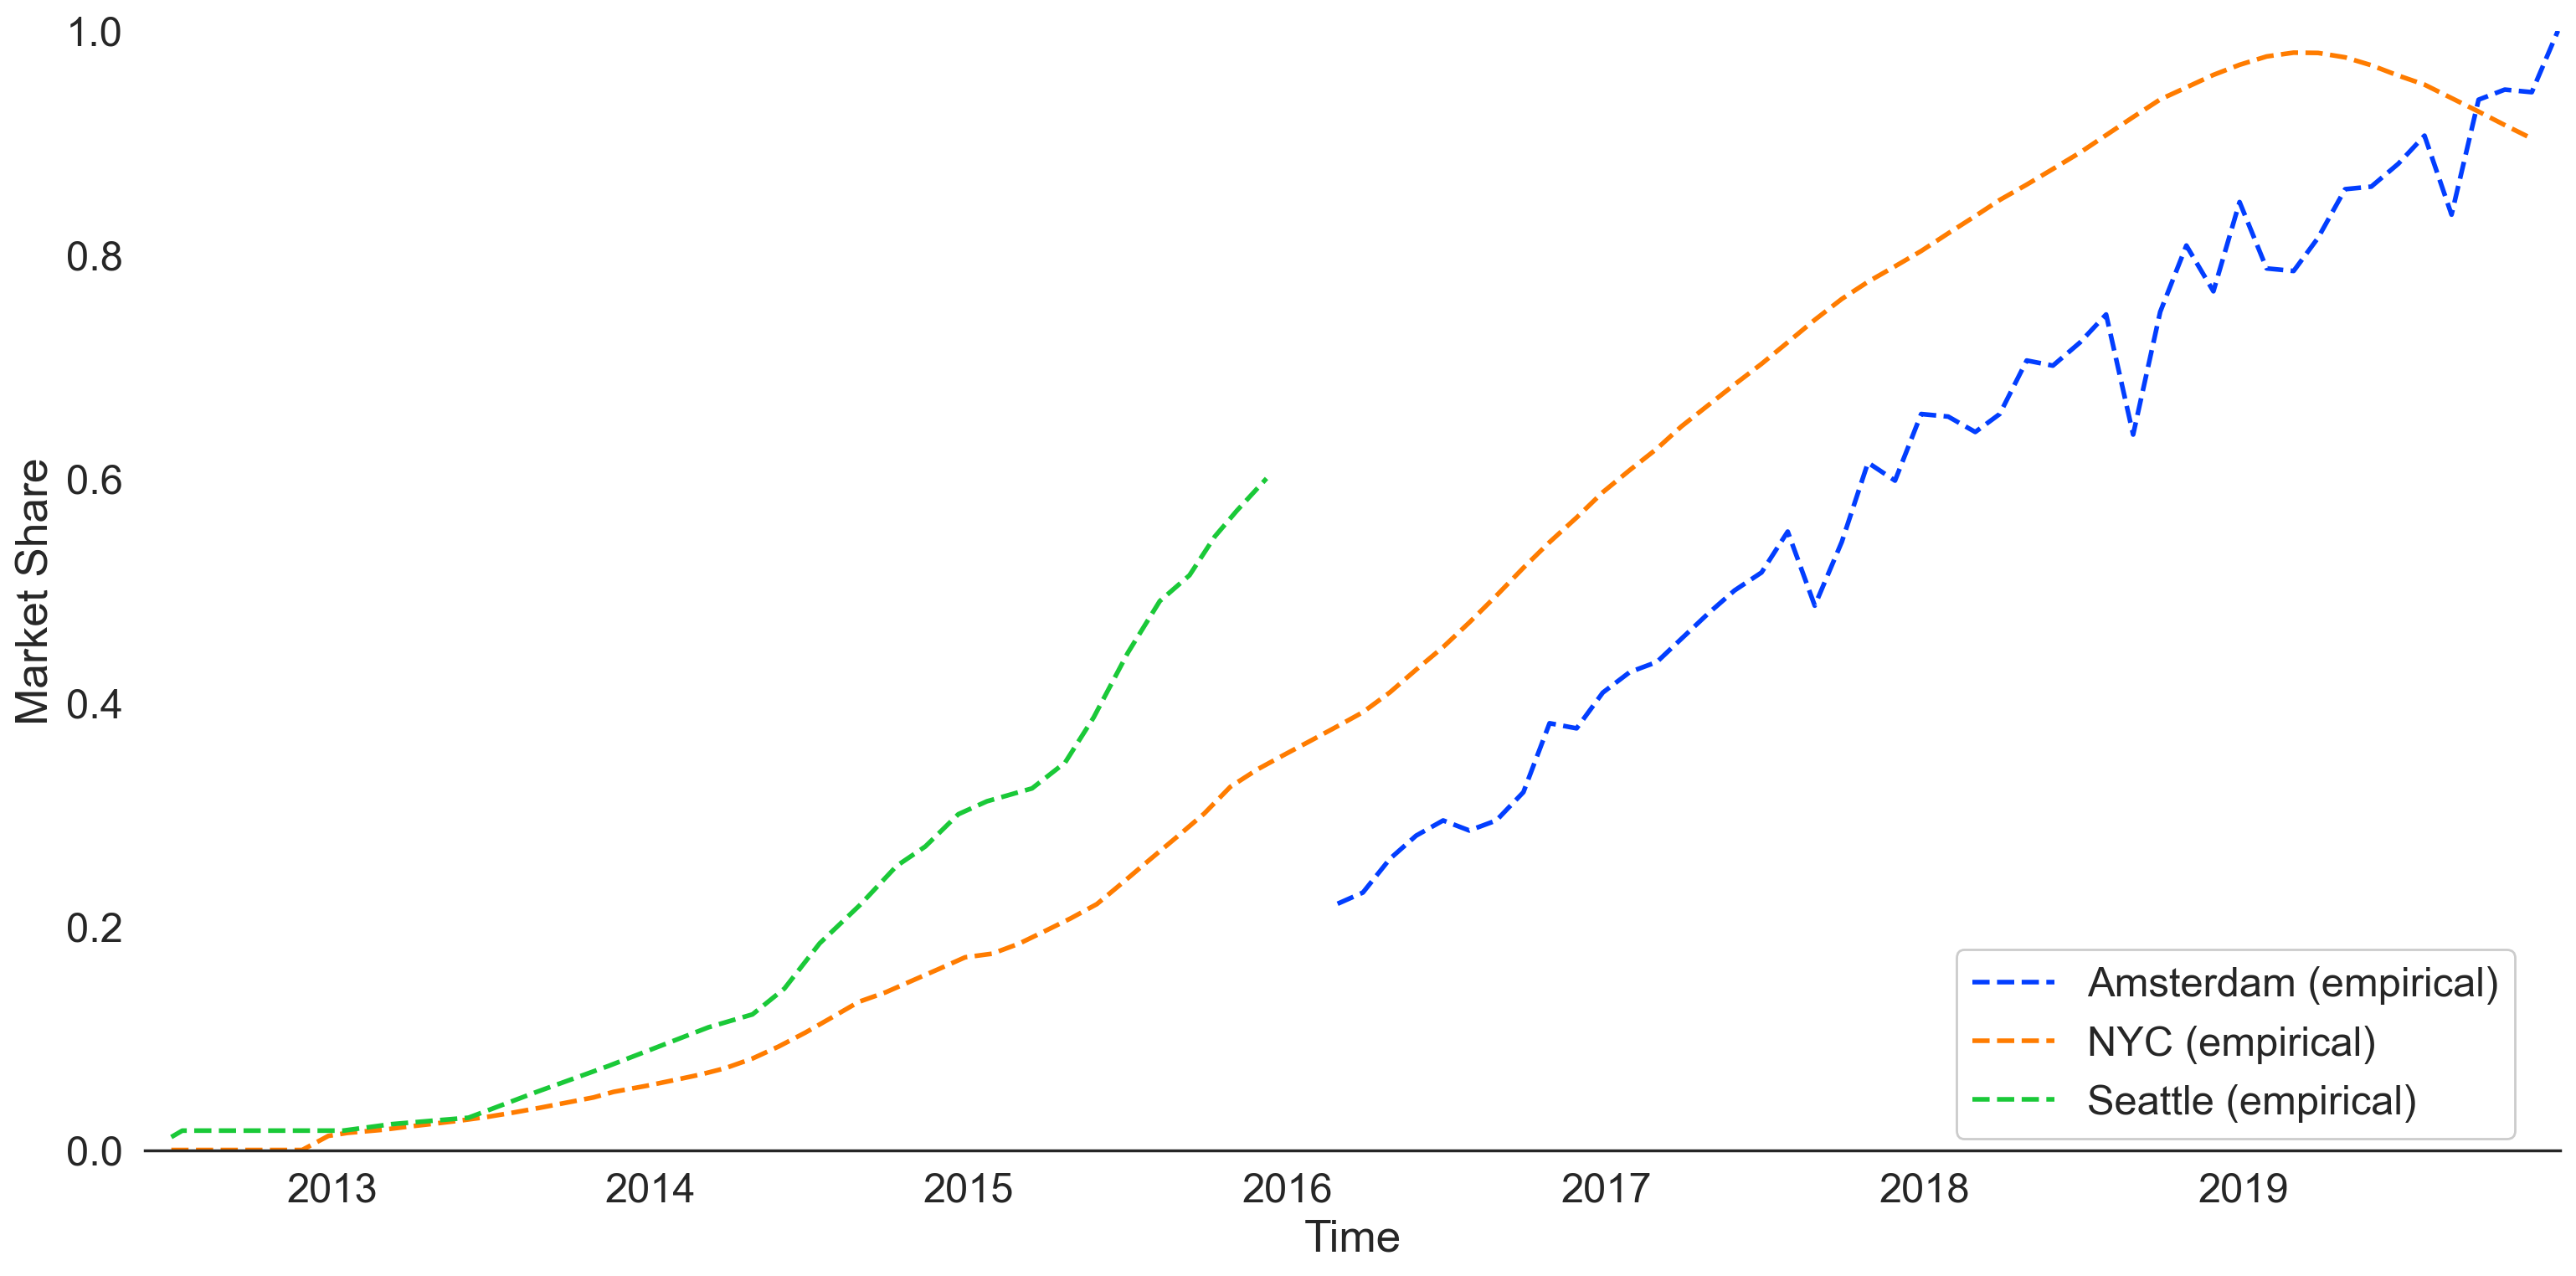

In [13]:
# Here we use min-max scaling or normalization: https://www.linkedin.com/advice/1/what-pros-cons-different-scaling-methods-data-normalization#:~:text=Data%20normalization%20and%20scaling%20can%20be%20achieved%20through%20several%20methods,dividing%20by%20the%20maximum%20value.

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

bright = sns.color_palette("bright")
blues = sns.color_palette("Blues")
greys = sns.color_palette("Greys")
paired = sns.color_palette("Paired")
#State-of-art-----------------------------------------------------------------------
# ertz_max = ertz.supply_share.max()
# ertz_last_v = ertz.supply_share[len(ertz)-1]
# sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].supply_share/ertz_max,lw=2, label = 'Sun and Ertz (experimental)', color=paired[0], linestyle = 'solid')
# # sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].supply_share/ertz_max,lw=1, color='C2', marker = '.')

# arjan_max = arjan.supply_share.max()
# arjan_last_v = arjan.supply_share[len(arjan)-1]
# sns.lineplot(x=arjan.date, y=arjan.supply_share/arjan_max, lw=2, label = 'de Ruijter et al. (experimental)', color=paired[6], linestyle = 'solid')
# aj_date = nyc.loc[6:].date; aj_date[6] = pd.Timestamp('2013-01-19')
# sns.lineplot(x=aj_date, y=arjan_last_v/arjan_max, lw=2, color=paired[6], linestyle = 'solid')

# djavadian_max = djavadian.supply_share.max()
# djavadian_last_v = djavadian.supply_share[len(djavadian)-1]
# sns.lineplot(x=djavadian.date, y=djavadian.supply_share/djavadian_max,lw=2, label = 'Djavadian and Chow (experimental)', color=paired[2], linestyle = 'solid')
# dj_date = nyc.loc[16:].date; dj_date[16] = pd.Timestamp('2013-11-20')
# sns.lineplot(x=dj_date, y=djavadian_last_v/djavadian_max,lw=2, color=paired[2], linestyle = 'solid')

#Empirical-----------------------------------------------------------------------
ams_max = ams['Number_of_drivers'].max()
ams_y =ams['Number_of_drivers']# smooth(ams['Number_of_drivers'], w=9)
ams_y = [0 if math.isnan(y) else y/ams_max for y in ams_y]
ams_y[0] = 0.22; ams_y[1] = 0.23
sns.lineplot(x=ams.date, y=ams_y,lw=2, label = 'Amsterdam (empirical)', color=bright[0], linestyle = 'dashed')

nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'], w=9)
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
nyc_y = [0 if math.isnan(y) else y/nyc_max for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
sns.lineplot(x=nyc.date, y=nyc_y,lw=2, label = 'NYC (empirical)', color=bright[1], linestyle = 'dashed')

sea_max = sea.supply_share.max()
sns.lineplot(x=sea.date, y=0.6*sea.supply_share/sea_max,lw=2, label = 'Seattle (empirical)', color=bright[2], linestyle = 'dashed')
#Us-----------------------------------------------------------------------
# me_max = me.supply_share.max()
# me_last_v = me.supply_share[len(me)-1]
# yme = me.supply_share/me_max
# yme = smooth(yme)
# yme[0:5] = [0,0.02,0.04,0.06,0.07]
# sns.lineplot(x=me.date, y=yme,lw=4, label = 'This study (Amsterdam case)', color=bright[3])

ax.set(xlabel='Time', ylabel='Market Share',xlim=(pd.Timestamp('2012-06-01 00:00:00')
,pd.Timestamp('2019-12-30 00:00:00')), ylim=(0,1))
# labels = ['Ghasemi and Kucharski','NYC (Empirical)', 'Amsterdam (Empirical)', 'Miami (Empirical)', 'Djavadian and Chow', 'Sun and Ertz']
ax.legend(frameon=True,framealpha=1, loc=(0.75,0.01))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)

plt.tight_layout()
plt.savefig('Figs/new/midterm_comparison_empiricals.png')

In [30]:
yme

[0,
 0,
 0,
 0,
 0,
 0.07804222690681897,
 0.07966423820082354,
 0.0812862494948281,
 0.08290826078883266,
 0.08453027208283723,
 0.0861522833768418,
 0.08777429467084637,
 0.08939630596485093,
 0.0910183172588555,
 0.09264032855286006,
 0.09426233984686462,
 0.09588435114086918,
 0.09750636243487375,
 0.09912837372887831,
 0.10075038502288289,
 0.10237239631688745,
 0.10399440761089201,
 0.10561641890489658,
 0.10723843019890114,
 0.1088604414929057,
 0.11048245278691034,
 0.11384662435966054,
 0.11499350103218901,
 0.11583454392537659,
 0.11759308815658695,
 0.11858704793944494,
 0.11965746616713817,
 0.1209572597293371,
 0.12103371817417237,
 0.12348038840889977,
 0.12416851441241687,
 0.12439788974692256,
 0.12562122486428628,
 0.1263858093126386,
 0.12623289242296815,
 0.12730331065066142,
 0.12753268598516707,
 0.12837372887835463,
 0.12936768866121265,
 0.12852664576802508,
 0.1299793562198945,
 0.13051456533374112,
 0.13082039911308208,
 0.13120269133725823,
 0.1316614420062696

In [39]:
d = pd.read_csv('data/sea.csv')
d.columns = ['x', 'supply_share']
base = pd.Timestamp('2012-07-01')
d['date'] = d.apply(lambda row: base+datetime.timedelta(days=row.x*30),axis=1)
d.to_csv('data/Uber_Seattle.csv')
d

x  supply_share                       date
0    0.000000    126.985087 2012-07-01 00:00:00.000000
1    0.420609    190.476177 2012-07-13 14:50:19.156644
2    0.799158    190.476177 2012-07-24 23:23:37.894815
3    1.598316    190.476177 2012-08-17 22:47:15.789629
4    2.860146    190.476177 2012-09-24 19:18:18.250197
5    4.121976    190.476177 2012-11-01 15:49:20.710765
6    6.561514    190.476177 2013-01-13 20:17:24.794953
7    8.412196    253.970173 2013-03-10 08:46:53.076696
8   11.356467    317.461263 2013-06-06 16:39:22.145110
9   13.964247    571.428530 2013-08-23 22:15:27.903194
10  16.698214    825.398703 2013-11-13 22:42:49.888604
11  20.525761   1206.351056 2014-03-08 18:32:52.698147
12  22.208202   1333.333236 2014-04-28 05:54:19.305994
13  23.427969   1587.303410 2014-06-03 20:08:16.357453
14  24.773923   2031.746853 2014-07-14 05:13:29.636238
15  26.330177   2412.699206 2014-08-29 21:43:40.016759
16  27.718190   2793.651559 2014-10-10 13:05:48.723383
17  28.811778   2984.127736 2014-11-12 08:28:49.510055
18  30.073608   3301.588999 2014-12-20 04:59:51.970623
19  31.167192   3428.571179 2015-01-22 00:22:42.776025
20  32.891692   3555.556266 2015-03-14 18:01:04.811711
21  34.153521   3809.523533 2015-04-21 14:32:07.272279
22  35.247110   4253.969882 2015-05-24 09:55:08.058951
23  36.550998   4888.889502 2015-07-02 12:43:05.947358
24  37.770769   5396.826942 2015-08-08 02:57:12.980087
25  38.906416   5650.794209 2015-09-11 04:37:09.194598
26  39.873817   6031.746562 2015-10-10 05:08:53.753943
27  40.715036   6285.713829 2015-11-04 10:49:32.067232
28  41.850682   6603.175092 2015-12-08 12:29:28.281743

In [ ]:
==========================================================

#### Fig-3: Episodes (aggregated market share)

In [154]:
df_d = pd.read_csv('data/dataframes/episodes_demand1.csv')
df_s = pd.read_csv('data/dataframes/episodes_supply1.csv')
nP = 10000
nV = 1000

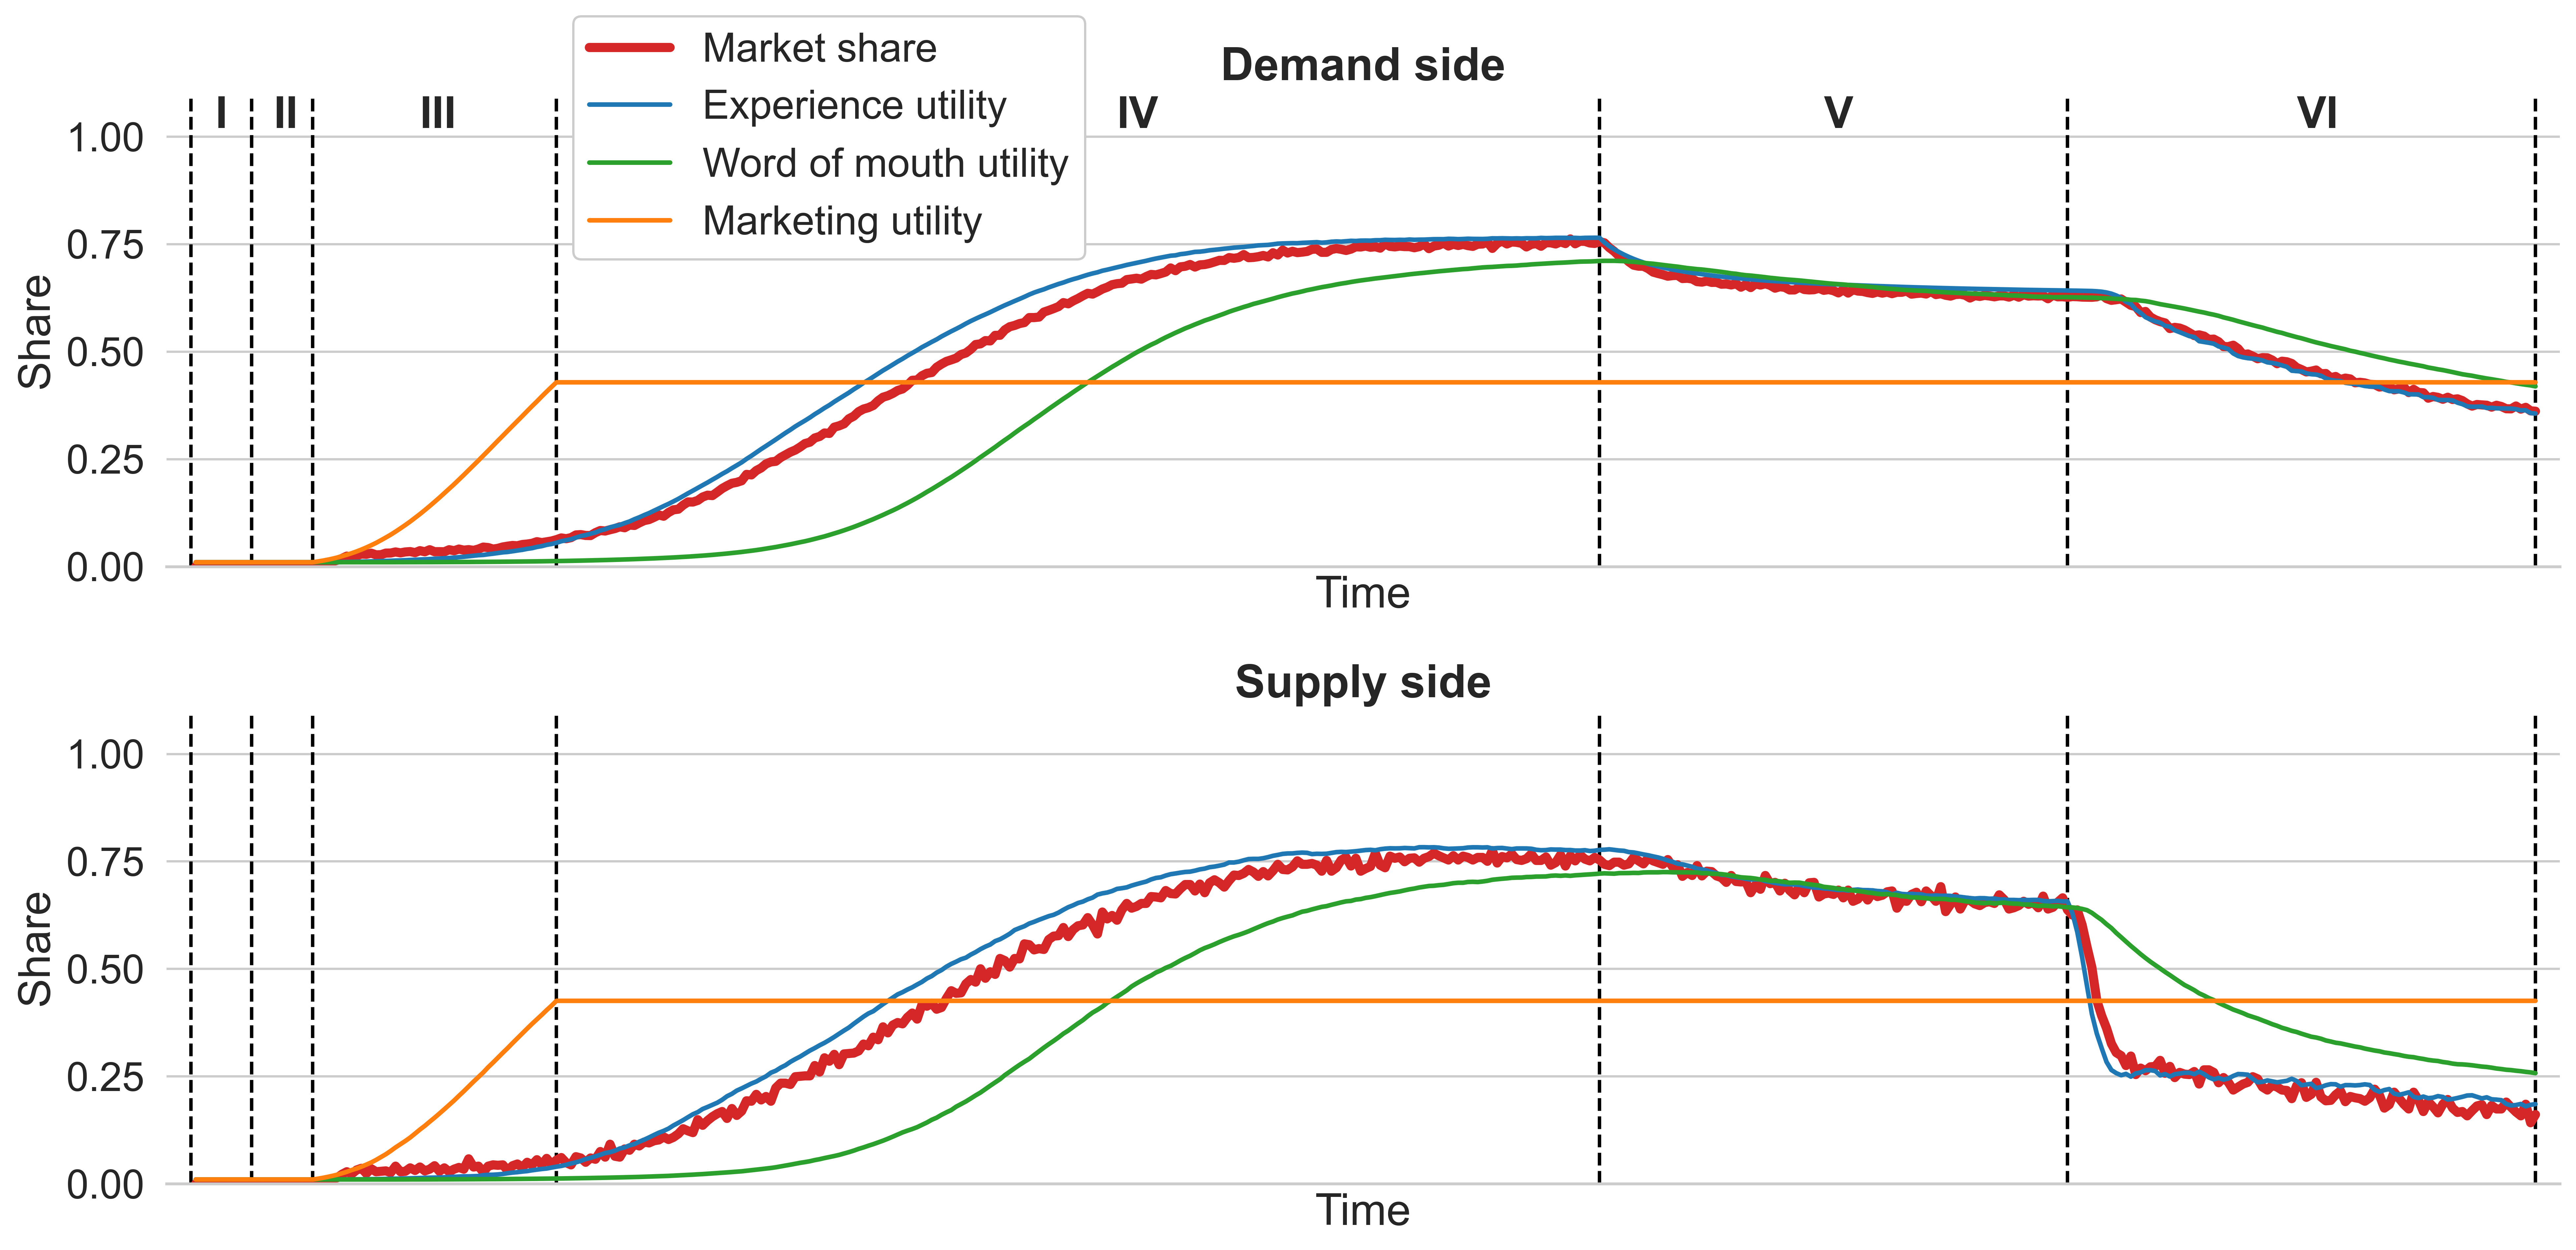

In [289]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

nD = 481
for row in range(0,2):
    
    if row==0:
        df=df_d[0:nD]; n=nP; label='Demand side'
    elif row==1:
        df = df_s[0:nD]; n =nV; label='Supply side'
        
    lx = [i for i in range(1,nD+1)]
    sns.lineplot(x=lx, y=df.OUT/n, label = 'Market share', color='C3', lw=4, ax=ax[row])
    sns.lineplot(x=lx, y=df.EXPERIENCE_U, label = 'Experience utility', color='C0', lw=2, ax=ax[row])
    sns.lineplot(x=lx, y=df.WOM_U, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[row])
    sns.lineplot(x=lx, y=df.MARKETING_U, label = 'Marketing utility', color='C1', lw=2, ax=ax[row])

    ax[row].grid(axis='x')
    ax[row].set(xlabel='Time', ylabel='Share', ylim=(0,1.1),  xlim=(-5,nD+5))
    ax[row].set_title(label,fontweight='bold', loc='center',fontsize=20)

    ax[row].vlines([0,12.5,25,75,289,385,481], 0, 1.1, linestyles='dashed', colors='black')
    ax[row].set_xticks([])
    # ax[0].set_xticks([0,14,25,75,289,385,481])
    # ax[0].set_xticklabels(['2012-01-01','2012-04-01','2012-07-01','2013-07-01','2018-01-01','2020-01-01','2022-01-01'],
    #                      rotation=-90)
    
for i in range(0,6):
        value = ['I','II','III','IV','V','VI']
        coords = [(5,1.02),(17,1.02),(47,1.02),(190,1.02),(335,1.02),(432,1.02)]
        ax[0].annotate(value[i], xy =coords[i], fontweight='bold')   
        
ax[0].legend(frameon=True,framealpha=1, loc=(0.17,0.65))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)

plt.tight_layout()
# plt.savefig('Fig1x.png')

#### Fig-4: Episodes (aggregated performance)

In [231]:
def smooth(y,w=17,o=1,d=2):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [273]:
RW = 4*11.16

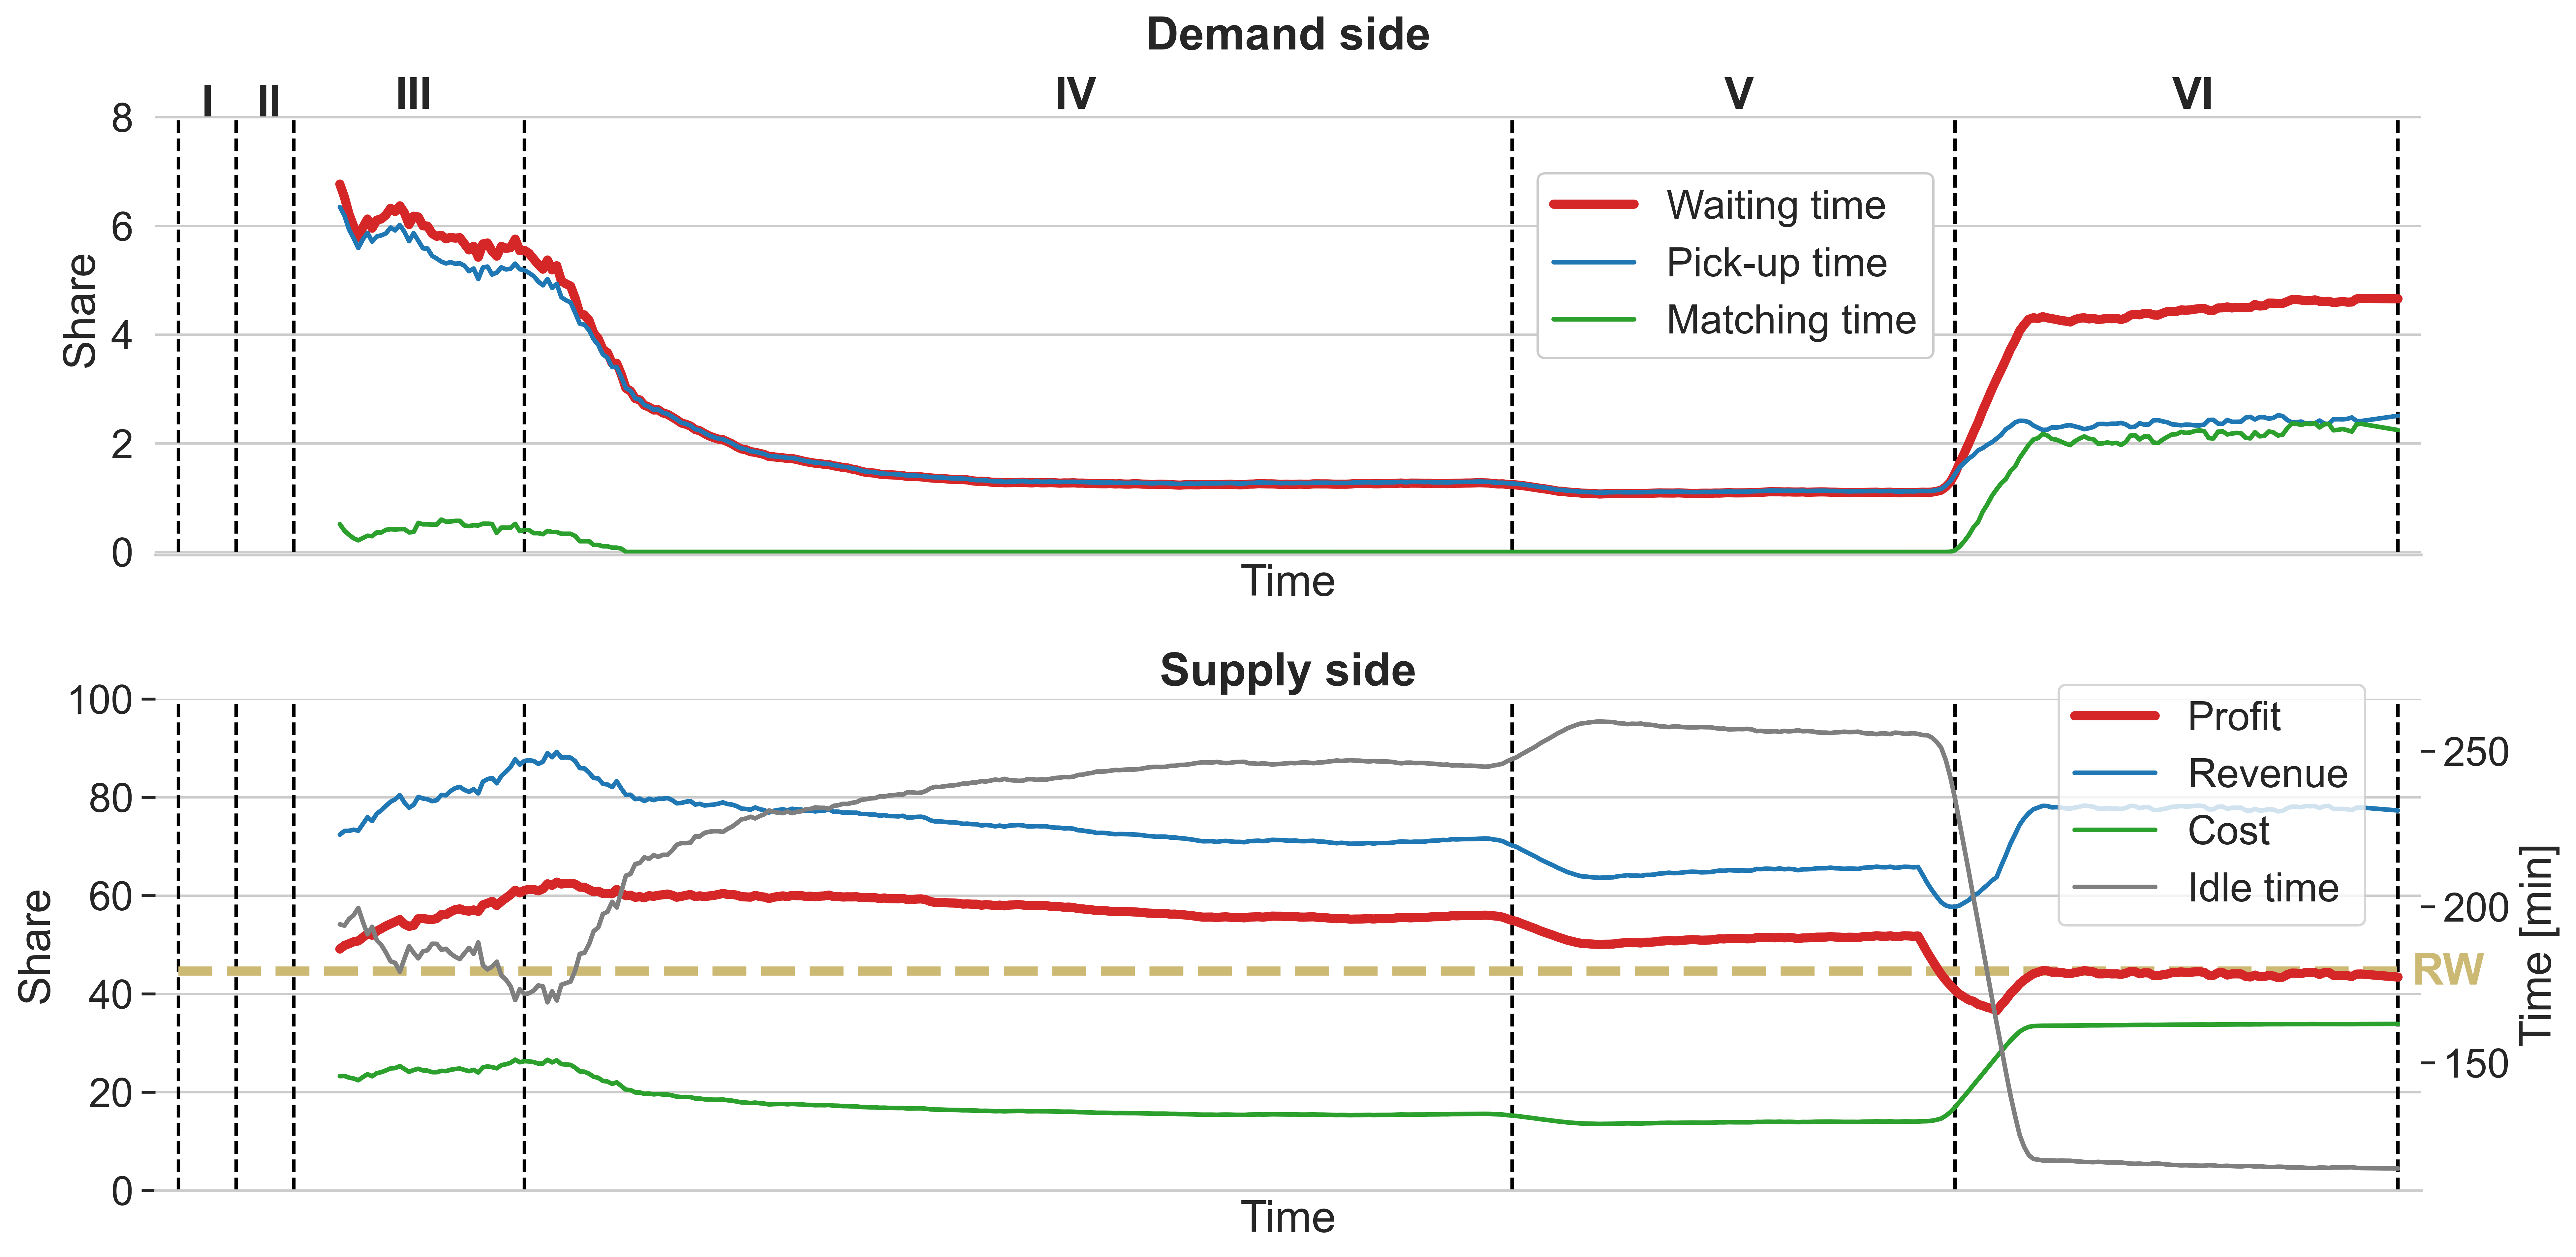

In [306]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

nD = 481
df_dd = df_d[0:nD]
df_ss = df_s[0:nD] 
lx = [i for i in range(1,nD+1)]

sns.lineplot(x=lx, y=smooth(df_dd.ACTUAL_WT), label = 'Waiting time', color='C3',lw=4, ax=ax[0])#, marker='o')
sns.lineplot(x=lx, y=smooth(df_ss.ARRIVES_AT_PICKUP/(df_ss.nRIDES*60)), label = 'Pick-up time', color='C0',lw=2, ax=ax[0])#, marker='o')
sns.lineplot(x=lx, y=smooth(df_dd.MATCHING_T), label = 'Matching time', color='C2',lw=2, ax=ax[0])#, marker='o')

sns.lineplot(x=lx, y=smooth(df_ss.ACTUAL_INC), label = 'Profit', color='C3',lw=4, ax=ax[1])#, marker='o')
sns.lineplot(x=lx, y=smooth(df_ss.REVENUE), label = 'Revenue', color='C0',lw=2, ax=ax[1])#, marker='o')
sns.lineplot(x=lx, y=smooth(df_ss.COST), label = 'Cost', color='C2',lw=2, ax=ax[1])#, marker='o')ax.twinx()
ax11 = ax[1].twinx()
sns.lineplot(x=lx, y=smooth(df_ss.IDLE_TIME/60), label = 'Idle time', color='C7',lw=2, ax=ax11)#, marker='o')
ax11.set(ylabel='Time [min]')
ax11.grid(b=None)

for row in [0,1]:
    if row==0:
        ax[row].set_title(label='Demand side',fontweight='bold', loc='center',fontsize=20)
        ax[row].vlines([0,12.5,25,75,289,385,481], 0, 8, linestyles='dashed', colors='black')
        ax[row].set(xlabel='Time', ylabel='Share', ylim=(-0.05,9),  xlim=(-5,nD+5))
    elif row==1:
        ax[row].set_title(label='Supply side',fontweight='bold', loc='center',fontsize=20)
        ax[row].vlines([0,12.5,25,75,289,385,481], 0, 100, linestyles='dashed', colors='black')
        ax[row].set(xlabel='Time', ylabel='Share', ylim=(-0.05,100),  xlim=(-5,nD+5))
        
    ax[row].grid(axis='x')
    ax[row].set_xticks([])
    
    

    # ax[0].set_xticks([0,14,25,75,289,385,481])
    # ax[0].set_xticklabels(['2012-01-01','2012-04-01','2012-07-01','2013-07-01','2018-01-01','2020-01-01','2022-01-01'],
    #                      rotation=-90)

    
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(5,8.02),(17,8.02),(47,8.16),(190,8.16),(335,8.16),(432,8.16)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')
    
ax[1].hlines([RW], 0, nD, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(nD+3,42), fontweight='bold', color='y')    


lines, labels = ax[1].get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
ax[1].legend(lines + lines2, labels + labels2,framealpha=0.8, loc=(0.84,0.54))
ax11.legend().remove()

ax[1].set_title(label='Supply side',fontweight='bold', loc='center',fontsize=20)

ax[0].legend(frameon=True,framealpha=1, loc=(0.61,0.4))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
# ax[1].get_legend().set_visible(False)
sns.despine(left=True)

plt.tight_layout()
# plt.savefig('Fig1x.png')

#### Fig-5: Individual evolutions

#### Fig-6: Episodes (aggregated performance)

In [40]:
import datetime
import matplotlib.dates as mdates

nD = 500
base = pd.Timestamp('2012-07-01')
n_days = nD
step = 7.6 #7.6
timestamp = [base + datetime.timedelta(days=step*x) for x in range(n_days)]

df_d = pd.read_csv('data/dataframes/baseline_demand1.csv'); df_d['date'] = timestamp
df_s = pd.read_csv('data/dataframes/baseline_supply1.csv'); df_s['date'] = timestamp

df_c30_d = pd.read_csv('data/dataframes/comm_30_demand1.csv'); df_c30_d['date'] = timestamp
df_c30_s = pd.read_csv('data/dataframes/comm_30_supply1.csv'); df_c30_s['date'] = timestamp

df_c10_d = pd.read_csv('data/dataframes/comm_10_demand1.csv'); df_c10_d['date'] = timestamp
df_c10_s = pd.read_csv('data/dataframes/comm_10_supply1.csv'); df_c10_s['date'] = timestamp

df_f18_d = pd.read_csv('data/dataframes/fare_1.8_demand1.csv'); df_f18_d['date'] = timestamp
df_f18_s = pd.read_csv('data/dataframes/fare_1.8_supply1.csv'); df_f18_s['date'] = timestamp

df_f06_d = pd.read_csv('data/dataframes/fare_0.6_demand1.csv'); df_f06_d['date'] = timestamp
df_f06_s = pd.read_csv('data/dataframes/fare_0.6_supply1.csv'); df_f06_s['date'] = timestamp

df_disc50_d = pd.read_csv('data/dataframes/disc_50%_demand1.csv'); df_disc50_d['date'] = timestamp
df_disc50_s = pd.read_csv('data/dataframes/disc_50%_supply1.csv'); df_disc50_s['date'] = timestamp

df_incen50_d = pd.read_csv('data/dataframes/incen_50%_demand1.csv'); df_incen50_d['date'] = timestamp
df_incen50_s = pd.read_csv('data/dataframes/incen_50%_supply1.csv'); df_incen50_s['date'] = timestamp

In [10]:
def ave(df_name):
    t = 0
    for i in range(1,6):
        df = pd.read_csv('data/dataframes/{}{}.csv'.format(df_name,i))
        t = t + df.OUT
    average = t/5
    return average

# ave('fare_0.6_demand')

In [41]:
def reps(df_name, side):
    df = pd.DataFrame()
    for i in range(1,6):
        df_new = pd.read_csv('data/dataframes/{}{}.csv'.format(df_name,i))
        df_new['rep_num'] = 'rep{}'.format(i)
        if side=='demand':
            df_new['OUT'] = df_new['OUT']/10000
        else
        df_new['date'] = timestamp
        df = pd.concat([df,df_new[['OUT','rep_num','date']]])
    
        # df.rename(columns = {'OUT':'OUT{}'.format(i)}, inplace = True)
    return df

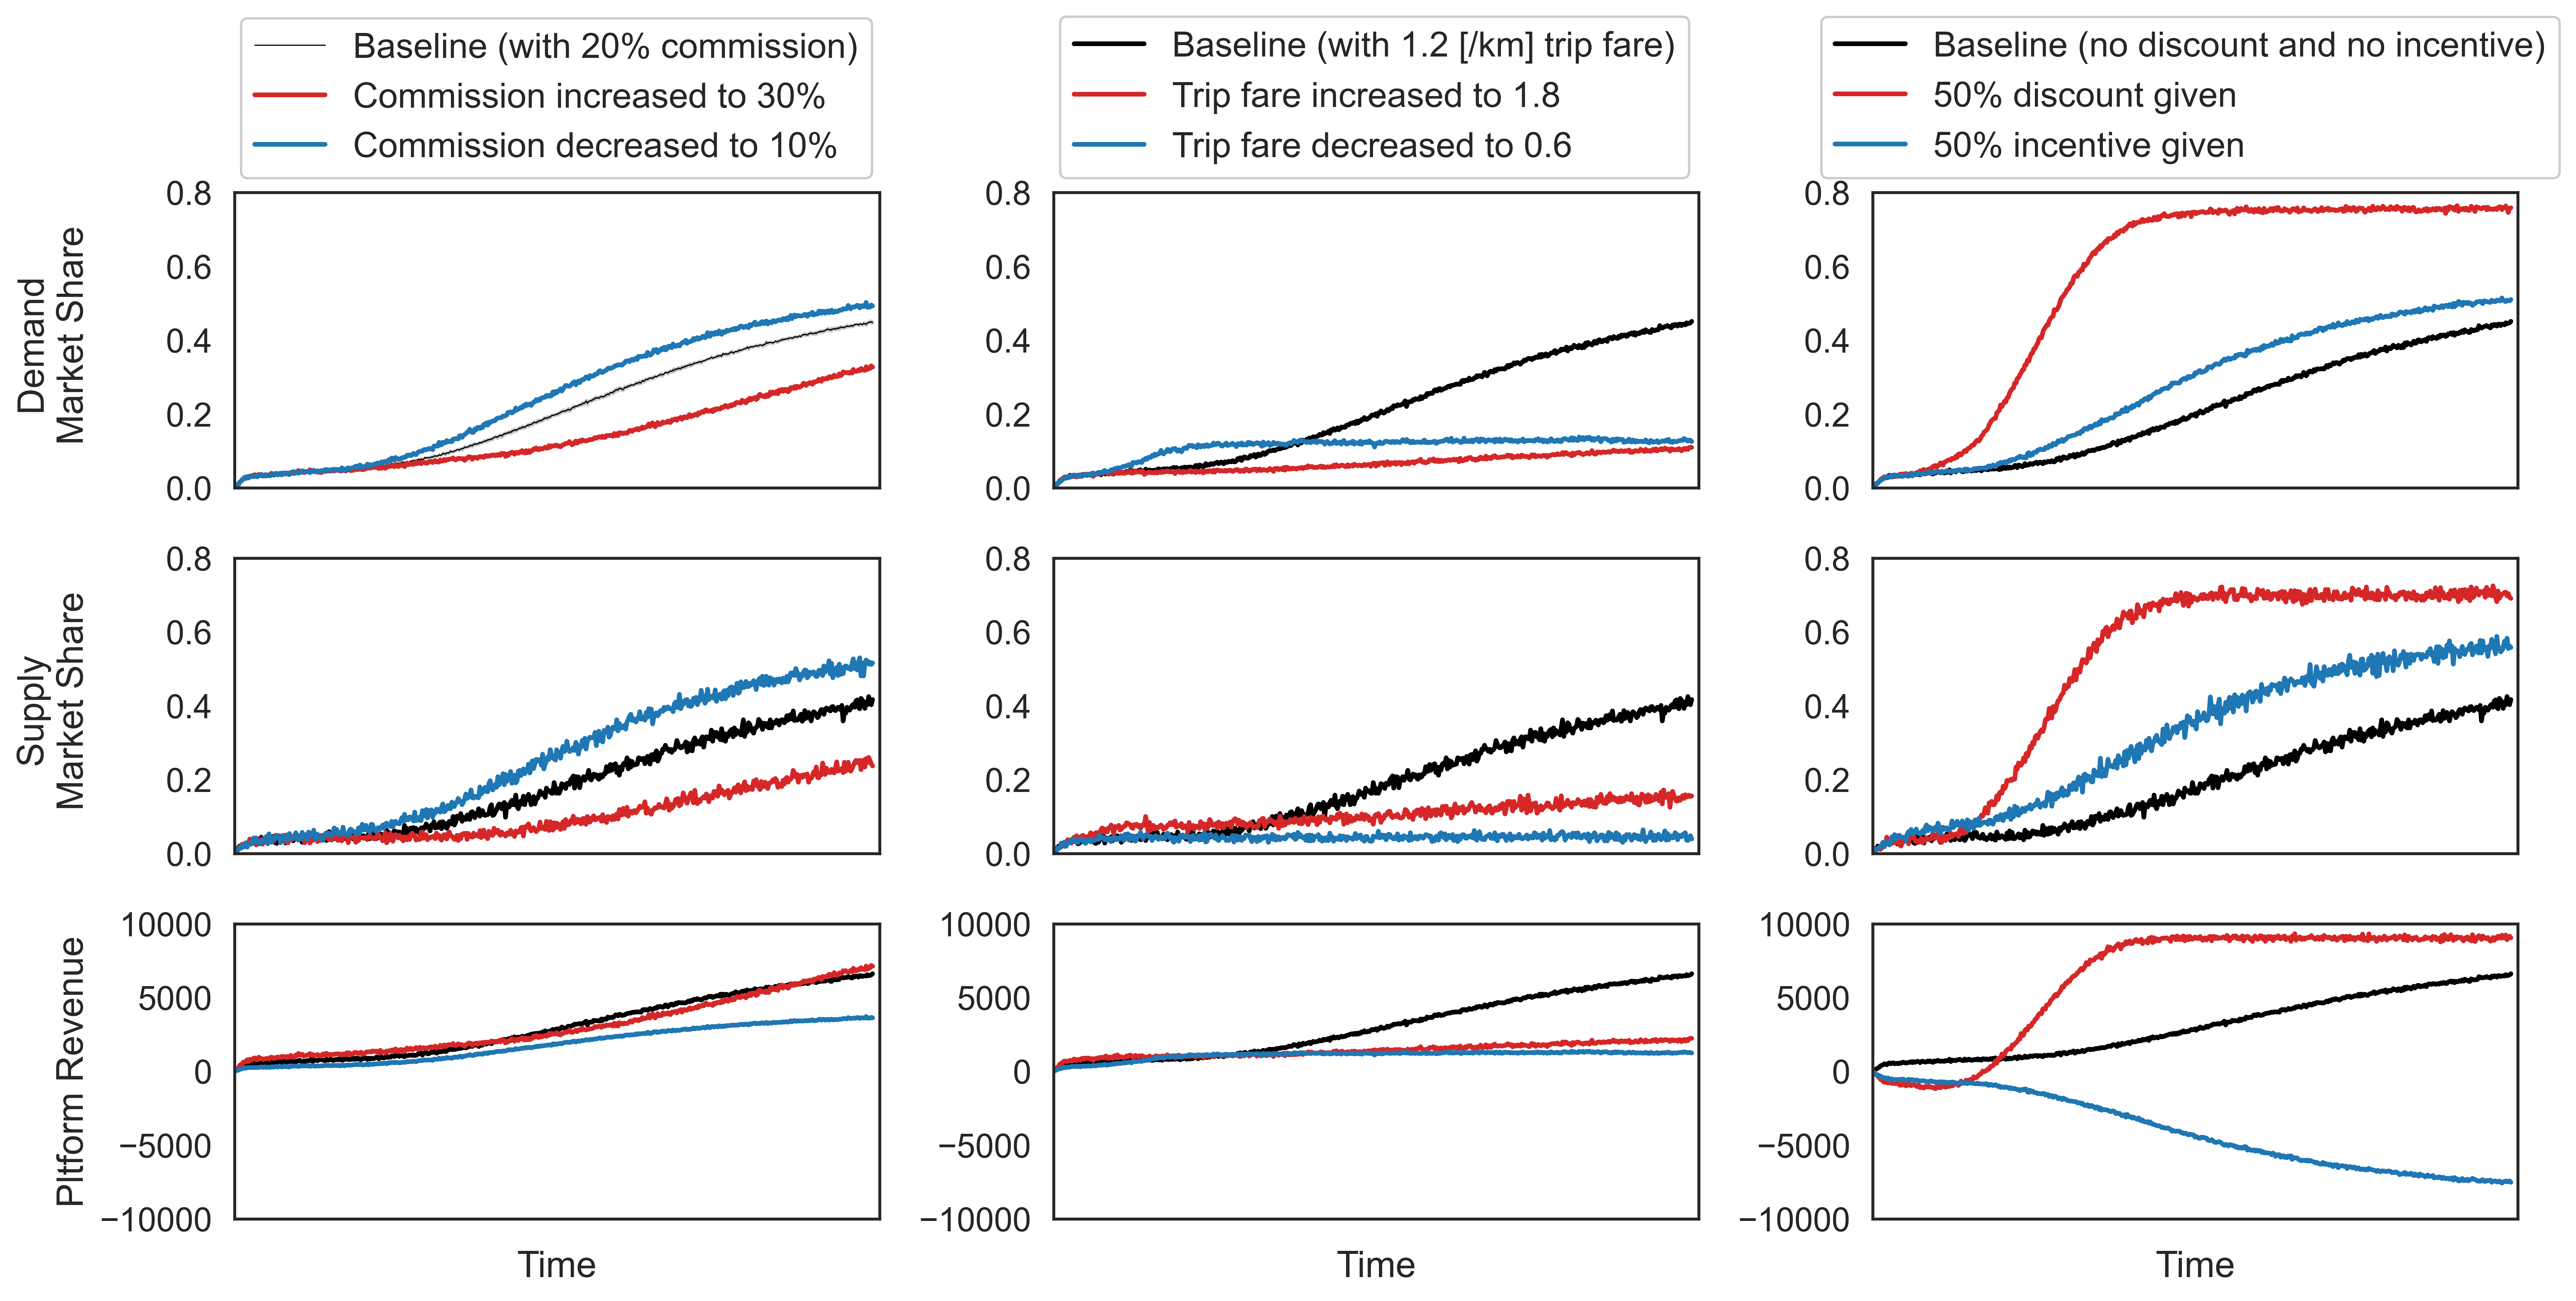

In [ ]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.3)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
# sns.despine(left=True)

pallete = sns.color_palette("tab10")
c2=pallete[3]; c3=pallete[0]
lw = 2
# c2='darkred'; c3='darkblue'
start_date = pd.Timestamp('2012-07-01 00:00:00'); end_date = pd.Timestamp('2022-12-30 00:00:00')


for row in range(0,3):
    
    lx = [i for i in range(1,nD+1)]
    
    if row==0:
        n=10000; label='Demand side'
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        # sns.lineplot(data=reps('baseline_demand'), x='date', y='OUT', label = 'Baseline (with 20% commission)', color='black', lw=0.5, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])

        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_d.date, y=df_incen50_d.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==1:
        n = 1000; label='Supply side'
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_s.date, y=df_c30_s.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_s.date, y=df_c10_s.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_s.date, y=df_f18_s.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_s.date, y=df_f06_s.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_s.date, y=df_disc50_s.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_s.date, y=df_incen50_s.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==2:
        n = 1000; label='Platform'
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT*df_c30_d.plat_revenue, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT*df_c10_d.plat_revenue, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT*df_f18_d.plat_revenue, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT*df_f06_d.plat_revenue, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (no discount and no incentive)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT*df_disc50_d.plat_revenue, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        x = df_incen50_d.OUT*df_incen50_d.plat_revenue
        r = (x*100)/20; r = (r*80/100)*0.5; p = x-r
        sns.lineplot(x=df_incen50_d.date, y=p, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
        
    for col in range(0,3):
        ax[row][col].set(xlabel='', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(xlabel='', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(ylabel=None)
        ax[row][col].set_xticklabels([])
        ax[row][col].get_legend().set_visible(False)


ax[0][0].set(xlabel='', ylabel='Demand \n Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[1][0].set(xlabel='', ylabel='Supply \n Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[2][0].set(xlabel='Time', ylabel='Pltform Revenue',xlim=(start_date, end_date), ylim=(-10000,10000))
ax[2][1].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-10000,10000))
ax[2][2].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-10000,10000))

ax[0][0].legend(frameon=True, framealpha=1, fontsize=15, loc=(0.01,1.05))
ax[0][1].legend(frameon=True, framealpha=1, fontsize=15, loc=(0.01,1.05))
ax[0][2].legend(frameon=True, framealpha=1, fontsize=15, loc=(-0.08,1.05))

# fig.subplots_adjust(left=0.2, wspace=0.6)
fig.align_ylabels()


# ax[row][col].grid(axis='x')

# ax[row][col].set_title(label,fontweight='bold', loc='center',fontsize=10)
# ax[0][col].legend(frameon=True,framealpha=1, loc=(0.01,0.7))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
# ax[0][0].get_legend().set_visible(False)

plt.tight_layout()
# plt.savefig('9cells.png')

In [42]:
reps('baseline_demand')

OUT rep_num                date
0    0.0000    rep1 2012-07-01 00:00:00
1    0.0041    rep1 2012-07-08 14:24:00
2    0.0065    rep1 2012-07-16 04:48:00
3    0.0106    rep1 2012-07-23 19:12:00
4    0.0133    rep1 2012-07-31 09:36:00
..      ...     ...                 ...
495  0.4413    rep5 2022-10-19 00:00:00
496  0.4490    rep5 2022-10-26 14:24:00
497  0.4459    rep5 2022-11-03 04:48:00
498  0.4471    rep5 2022-11-10 19:12:00
499  0.4439    rep5 2022-11-18 09:36:00

[2500 rows x 3 columns]

In [43]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
# sns.despine(left=True)

lw = 1
c2='darkred'; c3='darkblue'
start_date = pd.Timestamp('2012-07-01 00:00:00'); end_date = pd.Timestamp('2022-12-30 00:00:00')


for row in range(0,3):
    
    lx = [i for i in range(1,nD+1)]
    
    if row==0:
        n=10000; label='Demand side'
        df = reps('baseline_demand'); df.OUT=df.OUT/n
        sns.lineplot(data=df, x='date', y='OUT', label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])

        sns.lineplot(x=df_d.date, y=df_d.OUT/n, label = 'Baseline', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_d.date, y=df_incen50_d.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==1:
        n = 1000; label='Supply side'
        dfs = reps('baseline_supply'); dfs.OUT=dfs.OUT/n
        sns.lineplot(data=dfs, x='date', y='OUT', label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_s.date, y=df_c30_s.OUT/n, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_s.date, y=df_c10_s.OUT/n, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline (with 1.2 [/km] trip fare)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_s.date, y=df_f18_s.OUT/n, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_s.date, y=df_f06_s.OUT/n, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_s.date, y=df_s.OUT/n, label = 'Baseline', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_s.date, y=df_disc50_s.OUT/n, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_incen50_s.date, y=df_incen50_s.OUT/n, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
    elif row==2:
        n = 1000; label='Platform'
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c30_d.date, y=df_c30_d.OUT*df_c30_d.plat_revenue, label = 'Commission increased to 30%', color=c2, lw=lw, ax=ax[row][0])
        sns.lineplot(x=df_c10_d.date, y=df_c10_d.OUT*df_c10_d.plat_revenue, label = 'Commission decreased to 10%', color=c3, lw=lw, ax=ax[row][0])
        
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f18_d.date, y=df_f18_d.OUT*df_f18_d.plat_revenue, label = 'Trip fare increased to 1.8', color=c2, lw=lw, ax=ax[row][1])
        sns.lineplot(x=df_f06_d.date, y=df_f06_d.OUT*df_f06_d.plat_revenue, label = 'Trip fare decreased to 0.6', color=c3, lw=lw, ax=ax[row][1])
    
        sns.lineplot(x=df_d.date, y=df_d.OUT*df_d.plat_revenue, label = 'Baseline (with 20% commission)', color='black', lw=lw, ax=ax[row][2])
        sns.lineplot(x=df_disc50_d.date, y=df_disc50_d.OUT*df_disc50_d.plat_revenue, label = '50% discount given', color=c2, lw=lw, ax=ax[row][2])
        x = df_incen50_d.OUT*df_incen50_d.plat_revenue
        r = (x*100)/20; r = (r*80/100)*0.5; p = x-r
        sns.lineplot(x=df_incen50_d.date, y=p, label = '50% incentive given', color=c3, lw=lw, ax=ax[row][2])
        
        
    for col in range(0,3):
        ax[row][col].set(xlabel='Time', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(xlabel='Time', ylabel=None,xlim=(start_date, end_date), ylim=(0,0.8))
        ax[row][col].set(ylabel=None)
        ax[row][col].set_xticklabels([])
        ax[row][col].get_legend().set_visible(False)


ax[0][0].set(xlabel='Time', ylabel='Demand Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[1][0].set(xlabel='Time', ylabel='Supply Market Share',xlim=(start_date, end_date), ylim=(0,0.8))
ax[2][0].set(xlabel='Time', ylabel='Pltform revenue',xlim=(start_date, end_date), ylim=(-2000,10000))
ax[2][1].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-2000,10000))
ax[2][2].set(xlabel='Time',xlim=(start_date, end_date), ylim=(-2000,10000))



# ax[row][col].grid(axis='x')

# ax[row][col].set_title(label,fontweight='bold', loc='center',fontsize=10)
# ax[0][col].legend(frameon=True,framealpha=1, loc=(0.01,0.7))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
# ax[0][0].get_legend().set_visible(False)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021824C7E280> (for post_execute):


KeyboardInterrupt: 

In [16]:
reps('baseline_demand')

OUT rep_num                date
0       0.0    rep1 2012-07-01 00:00:00
1      41.0    rep1 2012-07-08 14:24:00
2      65.0    rep1 2012-07-16 04:48:00
3     106.0    rep1 2012-07-23 19:12:00
4     133.0    rep1 2012-07-31 09:36:00
..      ...     ...                 ...
495  4413.0    rep5 2022-10-19 00:00:00
496  4490.0    rep5 2022-10-26 14:24:00
497  4459.0    rep5 2022-11-03 04:48:00
498  4471.0    rep5 2022-11-10 19:12:00
499  4439.0    rep5 2022-11-18 09:36:00

[2500 rows x 3 columns]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='date'>

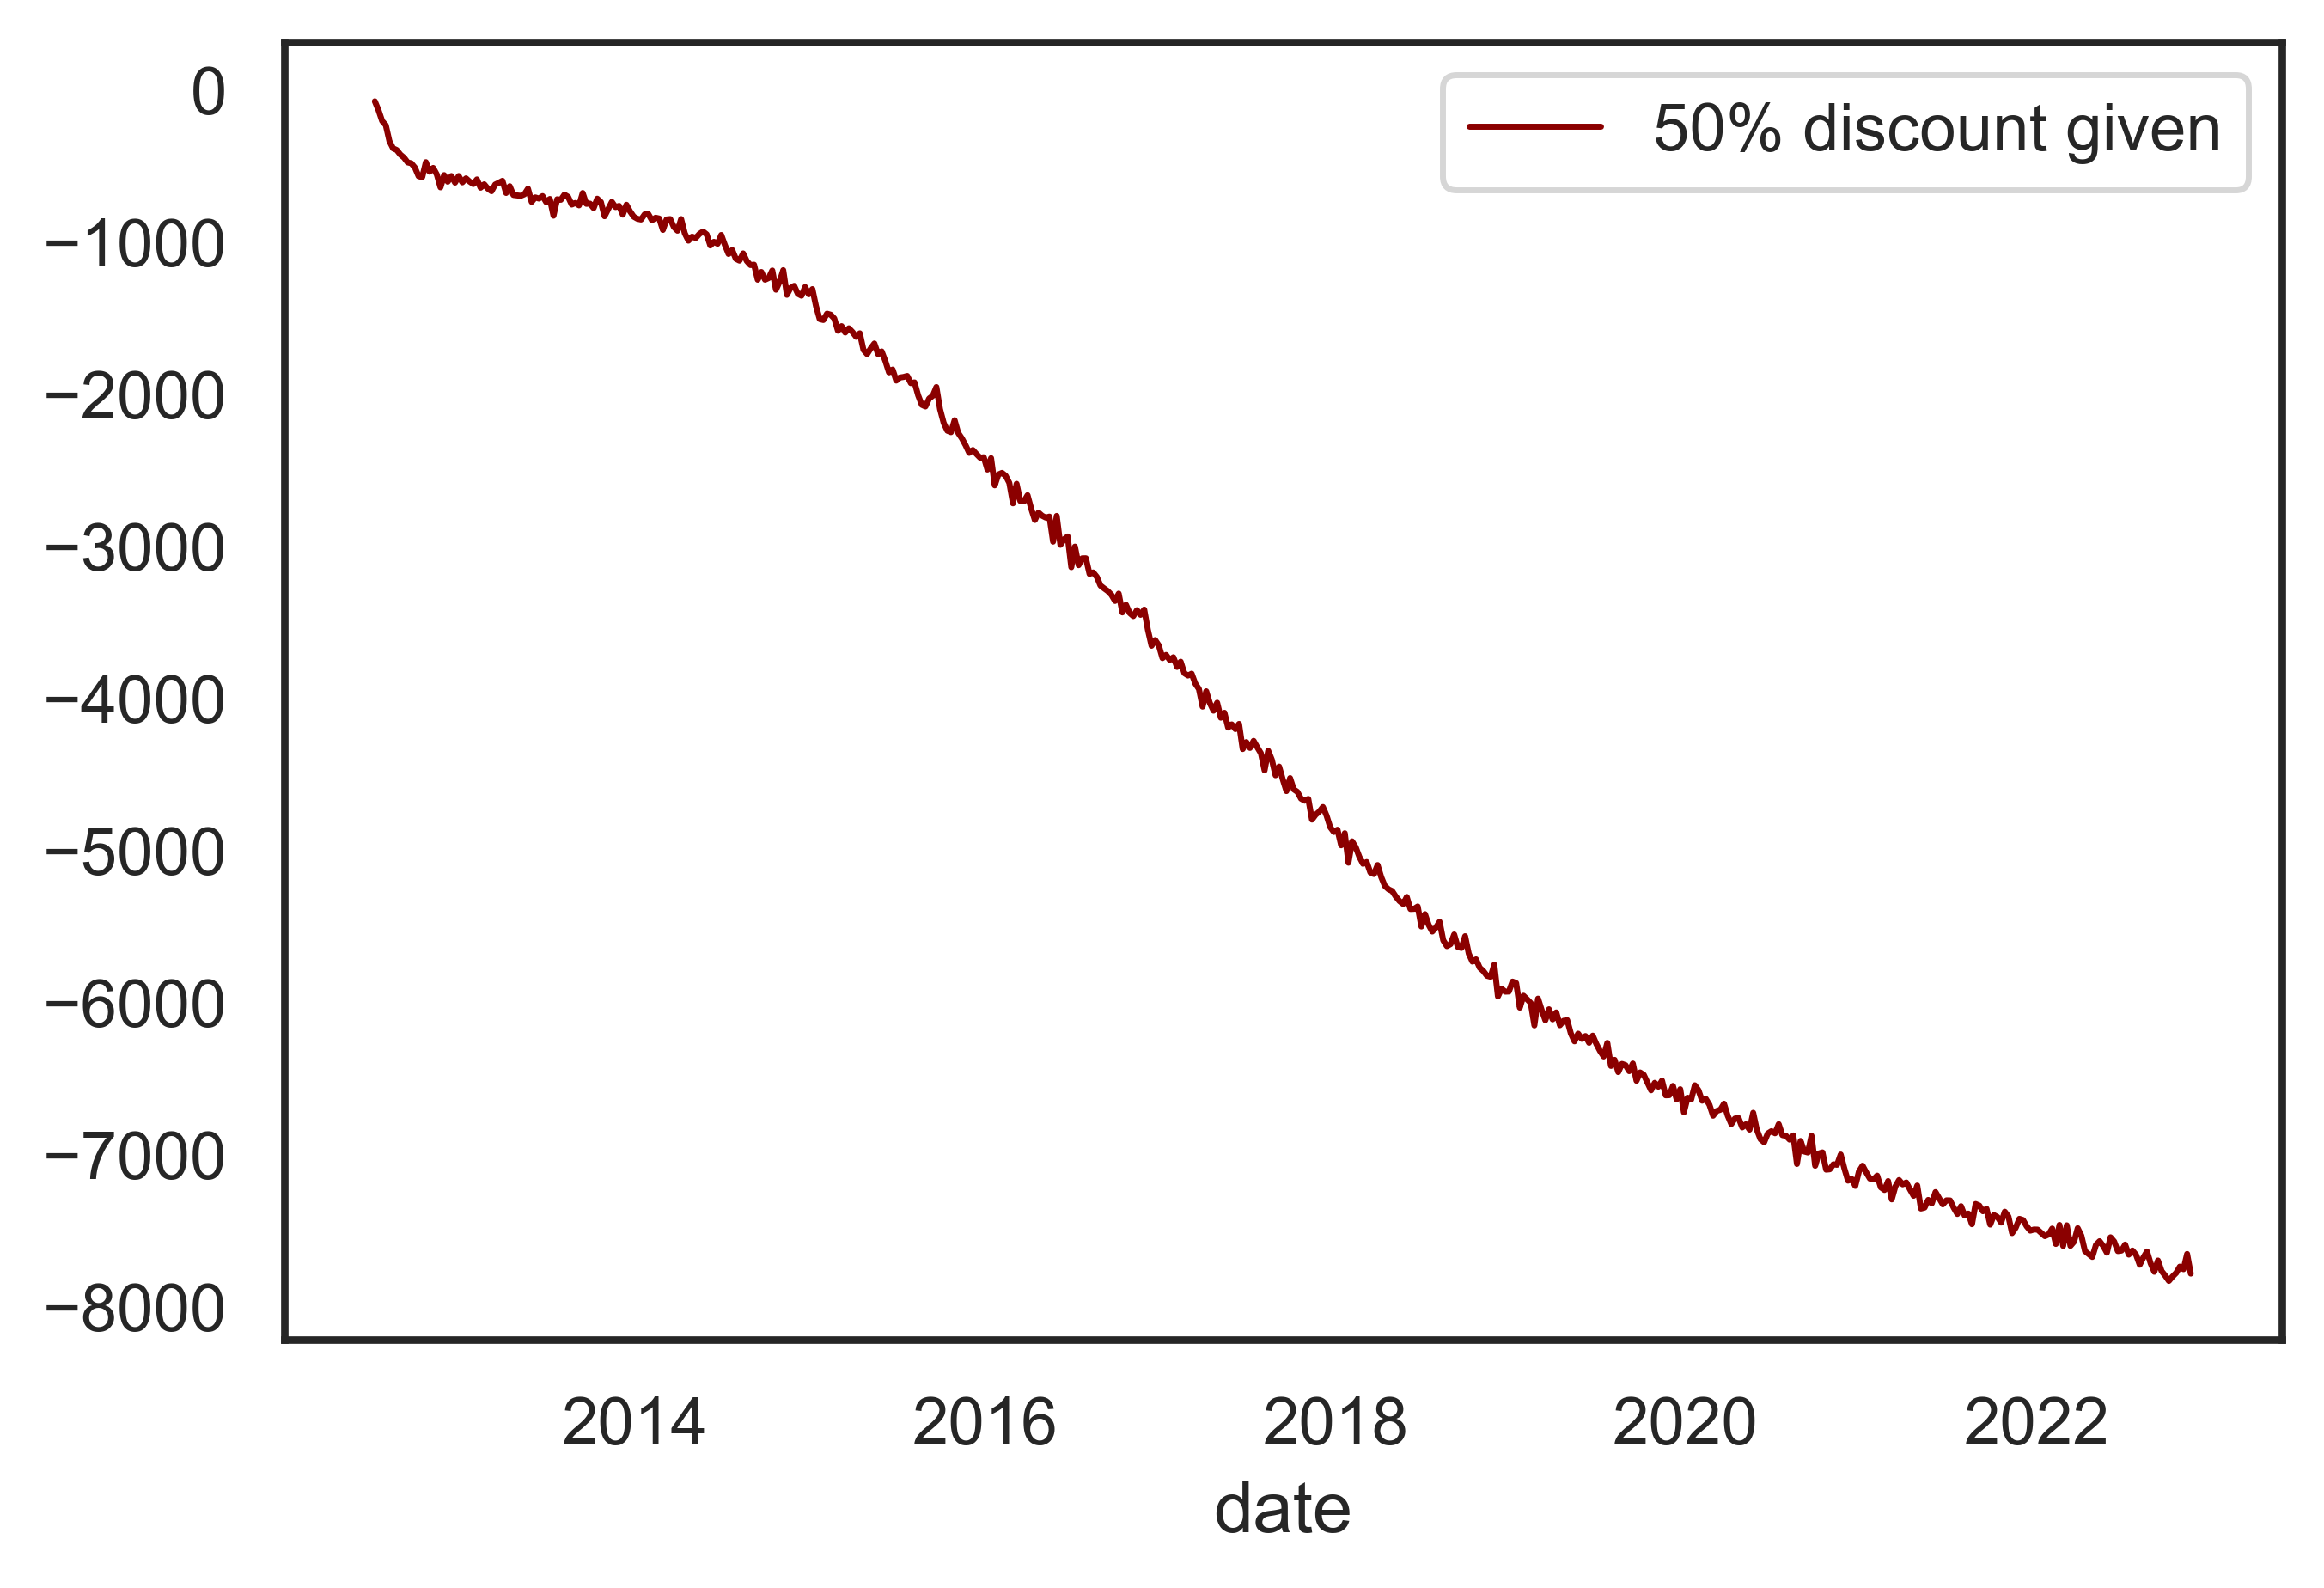

In [58]:
sns.lineplot(x=df_disc50_s.date, y=p, label = '50% discount given', color=c2, lw=lw)


In [43]:
df_disc50_d.OUT*df_disc50_d.plat_revenue

0             NaN
1      -106.22676
2      -187.79016
3      -246.81348
4      -338.53212
          ...    
495    9232.82020
496    8917.09808
497    9013.29720
498    9155.41584
499    9047.84060
Length: 500, dtype: float64

In [42]:
df_disc50_d.plat_revenue

0           NaN
1     -2.414245
2     -2.537705
3     -2.419740
4     -2.453131
         ...   
495    1.208801
496    1.177486
497    1.208055
498    1.208795
499    1.192388
Name: plat_revenue, Length: 500, dtype: float64

In [2]:
import pandas as pd

In [7]:
dfff = pd.read_csv('data/dataframes/fare_0.6_demand3.csv')
dfff

Unnamed: 0  EXPERIENCE_U     WOM_U  MARKETING_U     OUT       rh_U  \
0             0      0.010000  0.010000     0.011646     0.0        NaN   
1             1      0.010009  0.010000     0.013518    41.0 -13.850902   
2             2      0.010055  0.010001     0.015654    74.0  -8.692571   
3             3      0.010085  0.010002     0.018088   120.0 -11.120183   
4             4      0.010143  0.010004     0.020784   138.0 -10.448280   
..          ...           ...       ...          ...     ...        ...   
495         495      0.118552  0.154544     0.427578  1336.0 -11.902503   
496         496      0.117161  0.154591     0.427578  1341.0 -13.841187   
497         497      0.117000  0.154506     0.427578  1378.0 -12.542241   
498         498      0.116748  0.154571     0.427578  1286.0 -12.545394   
499         499      0.116513  0.154814     0.427578  1358.0 -12.714744   

         alt_U  ACTUAL_WT     U_dif   mu  ...  ACCEPTS_OFFER  REJECTS_OFFER  \
0          NaN        NaN       NaN  NaN  ...            NaN            NaN   
1   -11.776309  10.910976  0.169542  1.0  ...       7.048780            0.0   
2   -10.952702   5.893694 -0.096297  1.0  ...      15.000000            0.0   
3   -10.582134  10.465556  0.152182  1.0  ...       6.133333            0.0   
4   -11.343594   9.249517 -0.060494  1.0  ...       7.753623            0.0   
..         ...        ...       ...  ...  ...            ...            ...   
495 -12.332539   7.430140  0.036771  1.0  ...       0.904940            0.0   
496 -12.304008   8.040455  0.257442  1.0  ...       0.544370            0.0   
497 -12.330052   7.398609  0.107785  1.0  ...       0.764877            0.0   
498 -12.372569   7.488880  0.097505  1.0  ...       0.732504            0.0   
499 -12.320249   7.684769  0.120045  1.0  ...       0.717231            0.0   

     ARRIVES_AT_PICKUP  MEETS_DRIVER_AT_PICKUP  DEPARTS_FROM_PICKUP  \
0                  NaN                     NaN                  NaN   
1            16.097561              426.926829            24.146341   
2            20.000000              353.621622            30.000000   
3            18.500000              486.583333            27.750000   
4            19.275362              452.434783            28.913043   
..                 ...                     ...                  ...   
495          14.835329              120.550150            22.252994   
496          11.558538               73.499627            17.337808   
497          13.715530               95.046444            20.573295   
498          13.623639               98.033437            20.435459   
499          13.460972               99.519146            20.191458   

     ARRIVES_AT_DROPOFF  SETS_OFF_FOR_DEST  ARRIVES_AT_DEST  \
0                   NaN                NaN              NaN   
1            482.487805           8.048780              0.0   
2            561.621622          10.000000              0.0   
3            523.525000           9.250000              0.0   
4            551.000000           9.637681              0.0   
..                  ...                ...              ...   
495          422.254491           7.417665              0.0   
496          327.752424           5.779269              0.0   
497          388.250363           6.857765              0.0   
498          386.465785           6.811820              0.0   
499          385.536082           6.730486              0.0   

     PREFERS_OTHER_SERVICE  LOSES_PATIENCE  
0                      NaN             NaN  
1                      0.0      120.000000  
2                      0.0        0.000000  
3                      0.0       46.125000  
4                      0.0       22.282609  
..                     ...             ...  
495                    0.0      158.813623  
496                    0.0      259.574944  
497                    0.0      193.247460  
498                    0.0      196.073095  
499                    0.0      201.075110  

[500

In [ ]:
# ax[row][col].set_xticks([pd.Timestamp('2012'), pd.Timestamp('2022')])
# ax[row][col].xaxis.set_major_locator(mdates.YearLocator(10, 1, 1))
# ax[row][col].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.set_xticks([df_s.date.min(), df_s.date.max()])
# ax[row][col].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# # [base + datetime.timedelta(years=step*x) for x in range(10)]
# for label in ax.get_xticklabels(which='major'):
#     label.set(rotation=30, horizontalalignment='right')

In [2]:
import pandas as pd

In [63]:
fdd = pd.read_csv('data/dataframes/Mac_dataframes/disc_50%_demand.csv')
fdd.OUT[499]

7588.0

In [64]:
fdd = pd.read_csv('data/dataframes/disc_50%_demand1.csv')
fdd.OUT[499]

7588.0

In [62]:
fdd = pd.read_csv('data/dataframes/disc_50%_supply2.csv')
fdd.OUT[499]

689.0

In [14]:
1266*1.01

1278.66